# Educational Process Mining

https://archive-beta.ics.uci.edu/dataset/346/educational+process+mining+epm+a+learning+analytics+data+set

Educational Process Mining (EPM): A Learning Analytics Data Set. (2015). UCI Machine Learning Repository.

## Logistic regression to model intermediate scores as pass/fail event

This notebook includes Logistic Regression to model passing the intermediate evaluations.

In [1]:
select_sess = 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [4]:
from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score

In [5]:
from patsy import dmatrices

from numpy import arange

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from scipy.cluster import hierarchy

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import ElasticNet

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import GridSearchCV

In [6]:
import time

## Include functions
CMPINF2120_EPM_FUNC_INCL_Over_Lisa.ipynb includes functions used in this notebook.

In [7]:
%run CMPINF2120_EPM_FUNC_INCL_Over_Lisa.ipynb

## Load the data from github repository

In [8]:
interim_sqrt_path = 'https://raw.githubusercontent.com/lisaover/CMPINF2120_project/main/tp_sqrt_inputs_interim_df.csv'

In [9]:
interim_sqrt_init = pd.read_csv(interim_sqrt_path)

In [10]:
interim_sqrt_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 83 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sess                 3642 non-null   int64  
 1   sid                  3642 non-null   int64  
 2   actv_grp             3642 non-null   object 
 3   total_ms_tp000_sqrt  3642 non-null   float64
 4   mw_tp000_sqrt        3642 non-null   float64
 5   mwc_tp000_sqrt       3642 non-null   float64
 6   mcl_tp000_sqrt       3642 non-null   float64
 7   mcr_tp000_sqrt       3642 non-null   float64
 8   mm_tp000_sqrt        3642 non-null   float64
 9   ks_tp000_sqrt        3642 non-null   float64
 10  total_ms_tp010_sqrt  3642 non-null   float64
 11  mw_tp010_sqrt        3642 non-null   float64
 12  mwc_tp010_sqrt       3642 non-null   float64
 13  mcl_tp010_sqrt       3642 non-null   float64
 14  mcr_tp010_sqrt       3642 non-null   float64
 15  mm_tp010_sqrt        3642 non-null   f

In [11]:
interim_sqrt_init.isna().sum()

sess                   0
sid                    0
actv_grp               0
total_ms_tp000_sqrt    0
mw_tp000_sqrt          0
                      ..
mm_tp100_sqrt          0
ks_tp100_sqrt          0
interim_scr            0
max_interim_scr        0
interim_pass           0
Length: 83, dtype: int64

interim_sqrt_init['sid'] = interim_sqrt_init['sid'].astype('object')
interim_sqrt_init['sess'] = interim_sqrt_init['sess'].astype('object')

In [12]:
interim_sqrt_df = interim_sqrt_init.copy()

In [13]:
sqrt_vars = get_var_list(interim_sqrt_df,['sqrt'])

In [14]:
totl_vars = get_var_list_b(interim_sqrt_df,['total'])
mw_vars = get_var_list_b(interim_sqrt_df,['mw_'])
mwc_vars = get_var_list_b(interim_sqrt_df,['mwc'])
mcl_vars = get_var_list_b(interim_sqrt_df,['mcl'])
mcr_vars = get_var_list_b(interim_sqrt_df,['mcr'])
mm_vars = get_var_list_b(interim_sqrt_df,['mm'])
ks_vars = get_var_list_b(interim_sqrt_df,['ks'])

In [15]:
features_df = interim_sqrt_df.loc[:, sqrt_vars].copy()

In [16]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_ms_tp000_sqrt  3642 non-null   float64
 1   mw_tp000_sqrt        3642 non-null   float64
 2   mwc_tp000_sqrt       3642 non-null   float64
 3   mcl_tp000_sqrt       3642 non-null   float64
 4   mcr_tp000_sqrt       3642 non-null   float64
 5   mm_tp000_sqrt        3642 non-null   float64
 6   ks_tp000_sqrt        3642 non-null   float64
 7   total_ms_tp010_sqrt  3642 non-null   float64
 8   mw_tp010_sqrt        3642 non-null   float64
 9   mwc_tp010_sqrt       3642 non-null   float64
 10  mcl_tp010_sqrt       3642 non-null   float64
 11  mcr_tp010_sqrt       3642 non-null   float64
 12  mm_tp010_sqrt        3642 non-null   float64
 13  ks_tp010_sqrt        3642 non-null   float64
 14  total_ms_tp020_sqrt  3642 non-null   float64
 15  mw_tp020_sqrt        3642 non-null   f

In [17]:
feature_names = features_df.columns

In [18]:
len(feature_names)

77

## Visualizations

In [19]:
interim_sqrt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 83 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sess                 3642 non-null   int64  
 1   sid                  3642 non-null   int64  
 2   actv_grp             3642 non-null   object 
 3   total_ms_tp000_sqrt  3642 non-null   float64
 4   mw_tp000_sqrt        3642 non-null   float64
 5   mwc_tp000_sqrt       3642 non-null   float64
 6   mcl_tp000_sqrt       3642 non-null   float64
 7   mcr_tp000_sqrt       3642 non-null   float64
 8   mm_tp000_sqrt        3642 non-null   float64
 9   ks_tp000_sqrt        3642 non-null   float64
 10  total_ms_tp010_sqrt  3642 non-null   float64
 11  mw_tp010_sqrt        3642 non-null   float64
 12  mwc_tp010_sqrt       3642 non-null   float64
 13  mcl_tp010_sqrt       3642 non-null   float64
 14  mcr_tp010_sqrt       3642 non-null   float64
 15  mm_tp010_sqrt        3642 non-null   f

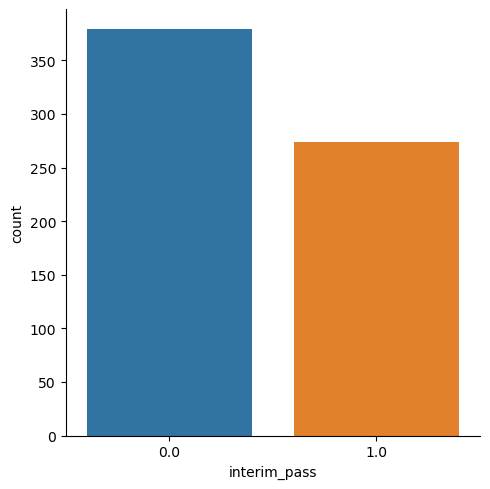

In [20]:
sns.catplot(data = interim_sqrt_df.loc[interim_sqrt_df['sess']==select_sess], x='interim_pass', kind='count')

plt.show()

## Cluster Analysis

In [21]:
select_sess_df = interim_sqrt_df.loc[interim_sqrt_df['sess']==select_sess].drop(columns=['interim_scr','max_interim_scr']).copy()

In [22]:
select_sess_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 652
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sess                 653 non-null    int64  
 1   sid                  653 non-null    int64  
 2   actv_grp             653 non-null    object 
 3   total_ms_tp000_sqrt  653 non-null    float64
 4   mw_tp000_sqrt        653 non-null    float64
 5   mwc_tp000_sqrt       653 non-null    float64
 6   mcl_tp000_sqrt       653 non-null    float64
 7   mcr_tp000_sqrt       653 non-null    float64
 8   mm_tp000_sqrt        653 non-null    float64
 9   ks_tp000_sqrt        653 non-null    float64
 10  total_ms_tp010_sqrt  653 non-null    float64
 11  mw_tp010_sqrt        653 non-null    float64
 12  mwc_tp010_sqrt       653 non-null    float64
 13  mcl_tp010_sqrt       653 non-null    float64
 14  mcr_tp010_sqrt       653 non-null    float64
 15  mm_tp010_sqrt        653 non-null    flo

In [23]:
select_sess_df.isna().sum()

sess                   0
sid                    0
actv_grp               0
total_ms_tp000_sqrt    0
mw_tp000_sqrt          0
                      ..
mcl_tp100_sqrt         0
mcr_tp100_sqrt         0
mm_tp100_sqrt          0
ks_tp100_sqrt          0
interim_pass           0
Length: 81, dtype: int64

In [24]:
features_df = select_sess_df.loc[:, sqrt_vars].copy()

In [25]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 652
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_ms_tp000_sqrt  653 non-null    float64
 1   mw_tp000_sqrt        653 non-null    float64
 2   mwc_tp000_sqrt       653 non-null    float64
 3   mcl_tp000_sqrt       653 non-null    float64
 4   mcr_tp000_sqrt       653 non-null    float64
 5   mm_tp000_sqrt        653 non-null    float64
 6   ks_tp000_sqrt        653 non-null    float64
 7   total_ms_tp010_sqrt  653 non-null    float64
 8   mw_tp010_sqrt        653 non-null    float64
 9   mwc_tp010_sqrt       653 non-null    float64
 10  mcl_tp010_sqrt       653 non-null    float64
 11  mcr_tp010_sqrt       653 non-null    float64
 12  mm_tp010_sqrt        653 non-null    float64
 13  ks_tp010_sqrt        653 non-null    float64
 14  total_ms_tp020_sqrt  653 non-null    float64
 15  mw_tp020_sqrt        653 non-null    flo

In [26]:
feature_names = features_df.columns

In [27]:
len(feature_names)

77

##### Bar chart shows the inputs have different scales

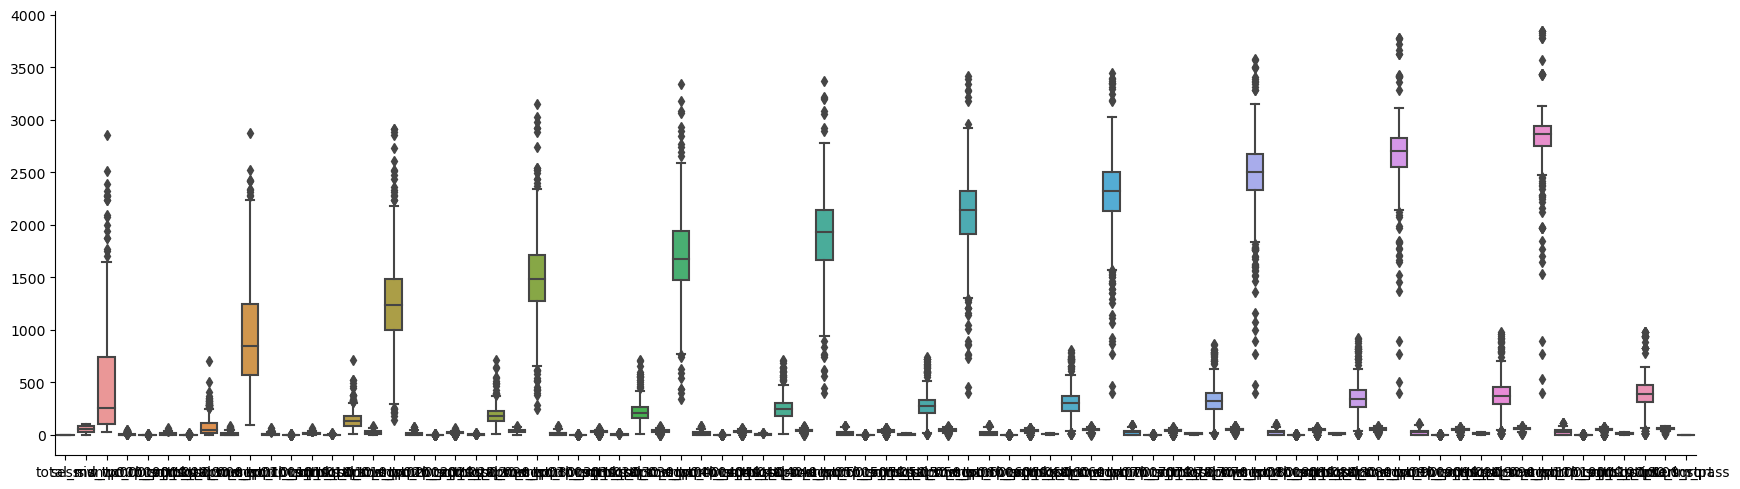

In [28]:
sns.catplot(data = select_sess_df, kind='box', aspect=3.5)

plt.show()

##### Correlation plot shows the inputs are highly correlated

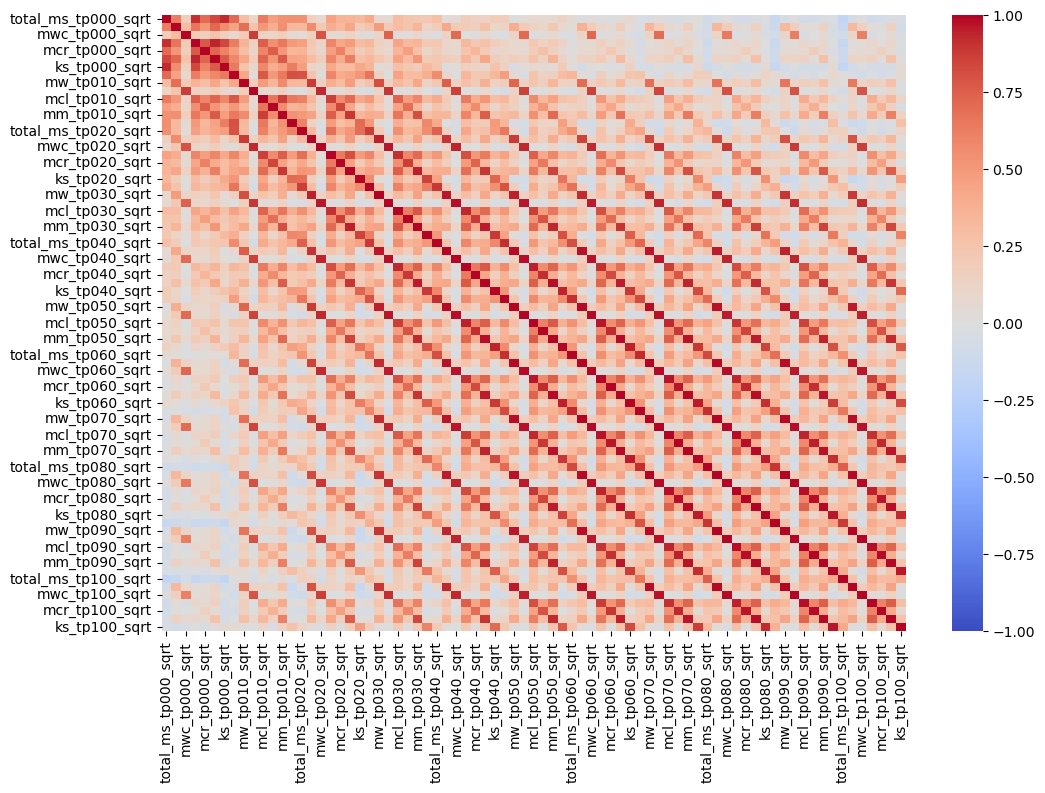

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(data = select_sess_df[feature_names].corr(), 
            vmin=-1, vmax=1, center = 0,
            cmap='coolwarm', 
            ax=ax)

plt.show()

### PCA

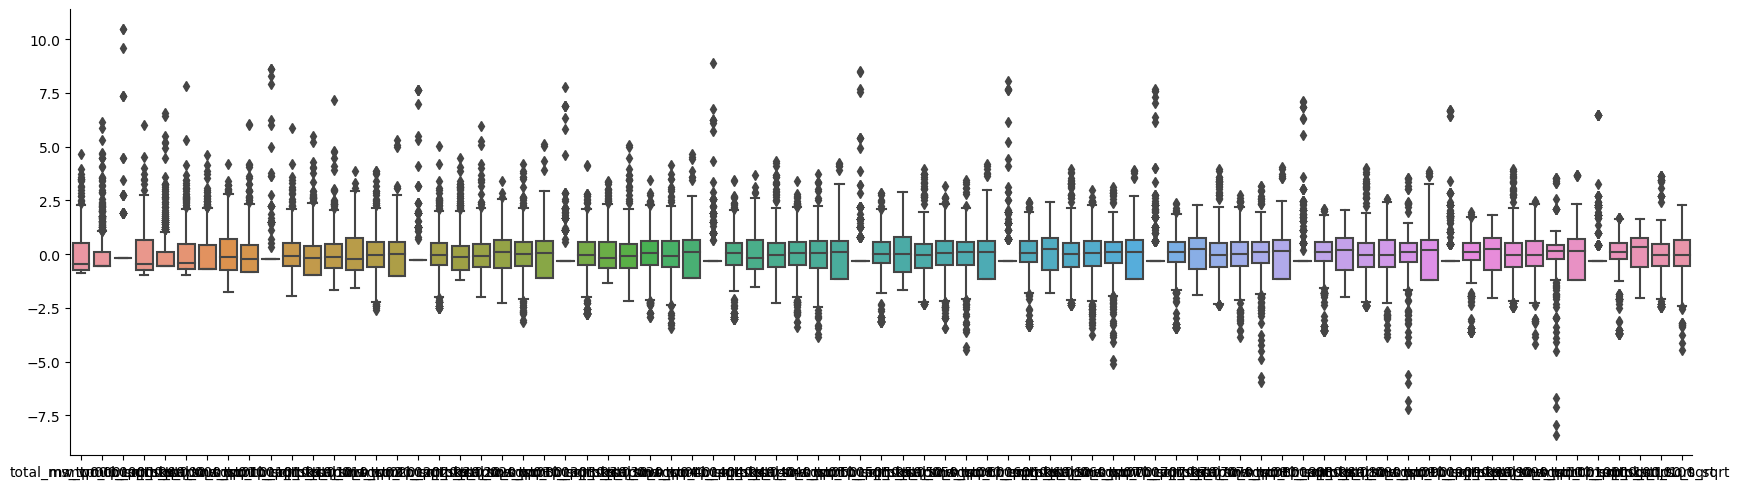

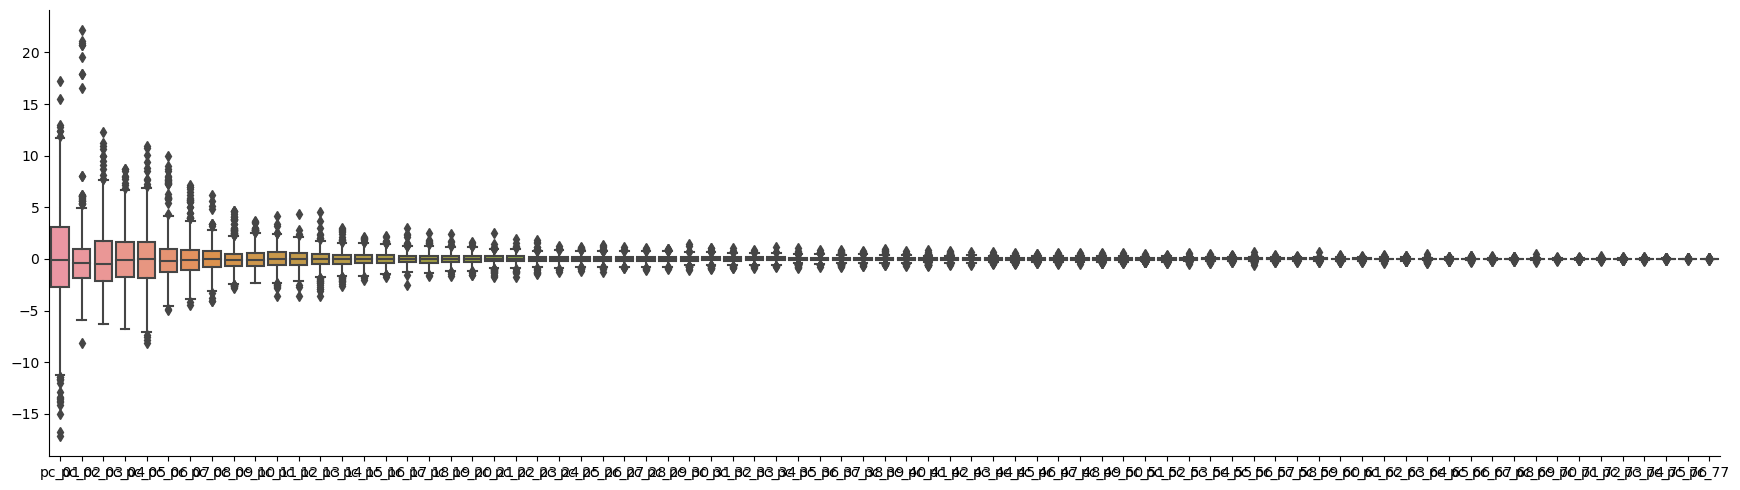

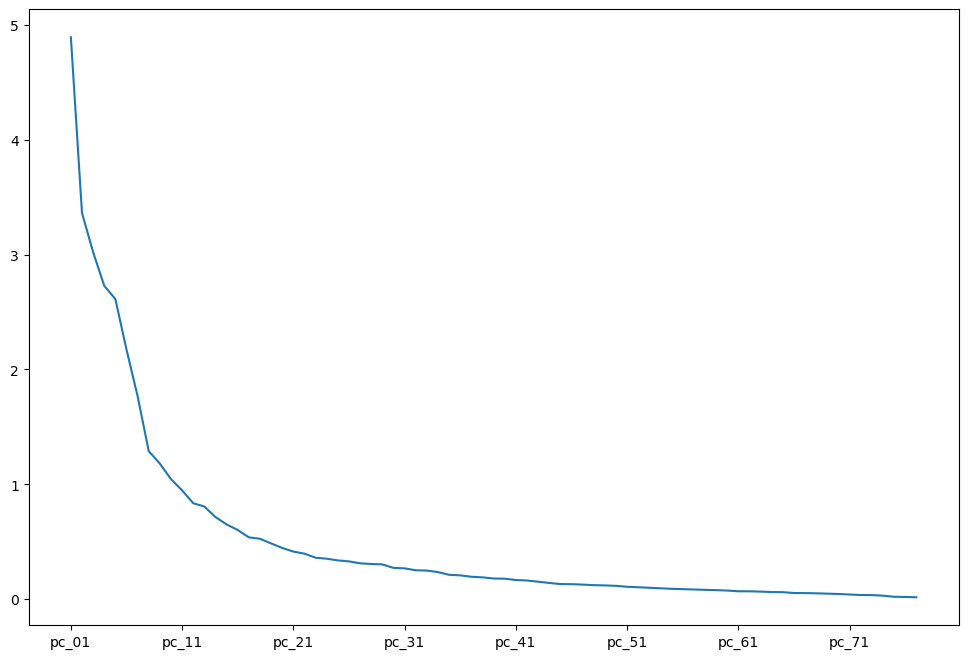

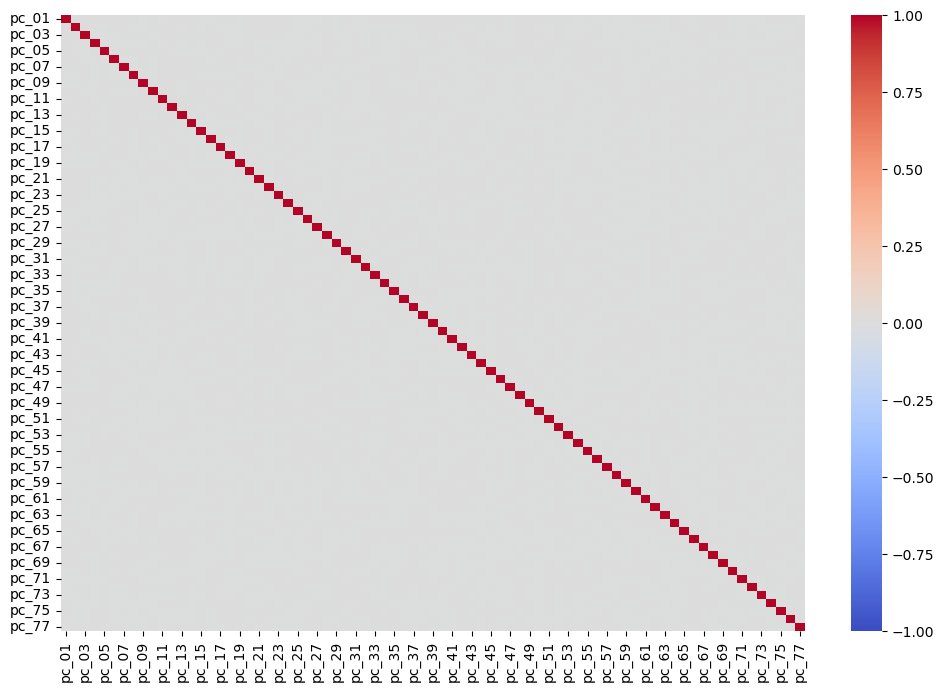

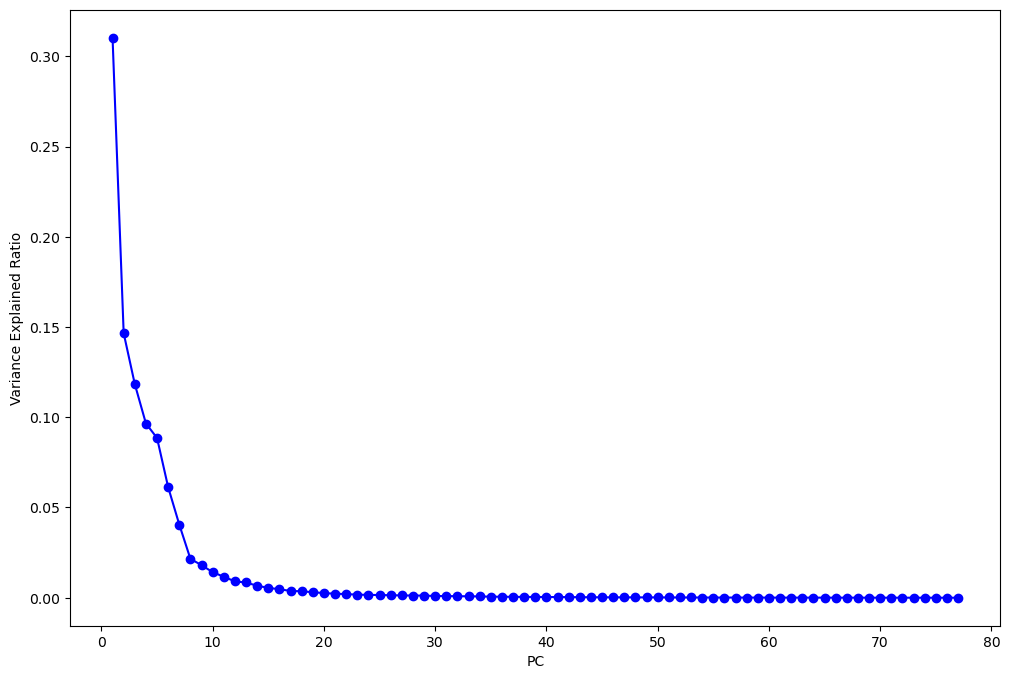

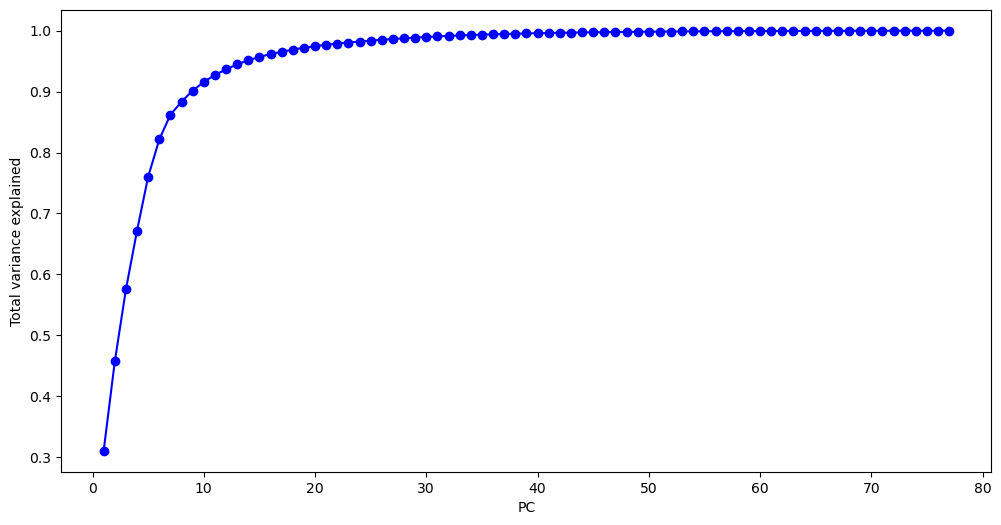

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 77 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC01    653 non-null    float64
 1   PC02    653 non-null    float64
 2   PC03    653 non-null    float64
 3   PC04    653 non-null    float64
 4   PC05    653 non-null    float64
 5   PC06    653 non-null    float64
 6   PC07    653 non-null    float64
 7   PC08    653 non-null    float64
 8   PC09    653 non-null    float64
 9   PC10    653 non-null    float64
 10  PC11    653 non-null    float64
 11  PC12    653 non-null    float64
 12  PC13    653 non-null    float64
 13  PC14    653 non-null    float64
 14  PC15    653 non-null    float64
 15  PC16    653 non-null    float64
 16  PC17    653 non-null    float64
 17  PC18    653 non-null    float64
 18  PC19    653 non-null    float64
 19  PC20    653 non-null    float64
 20  PC21    653 non-null    float64
 21  PC22    653 non-null    float64
 22  PC

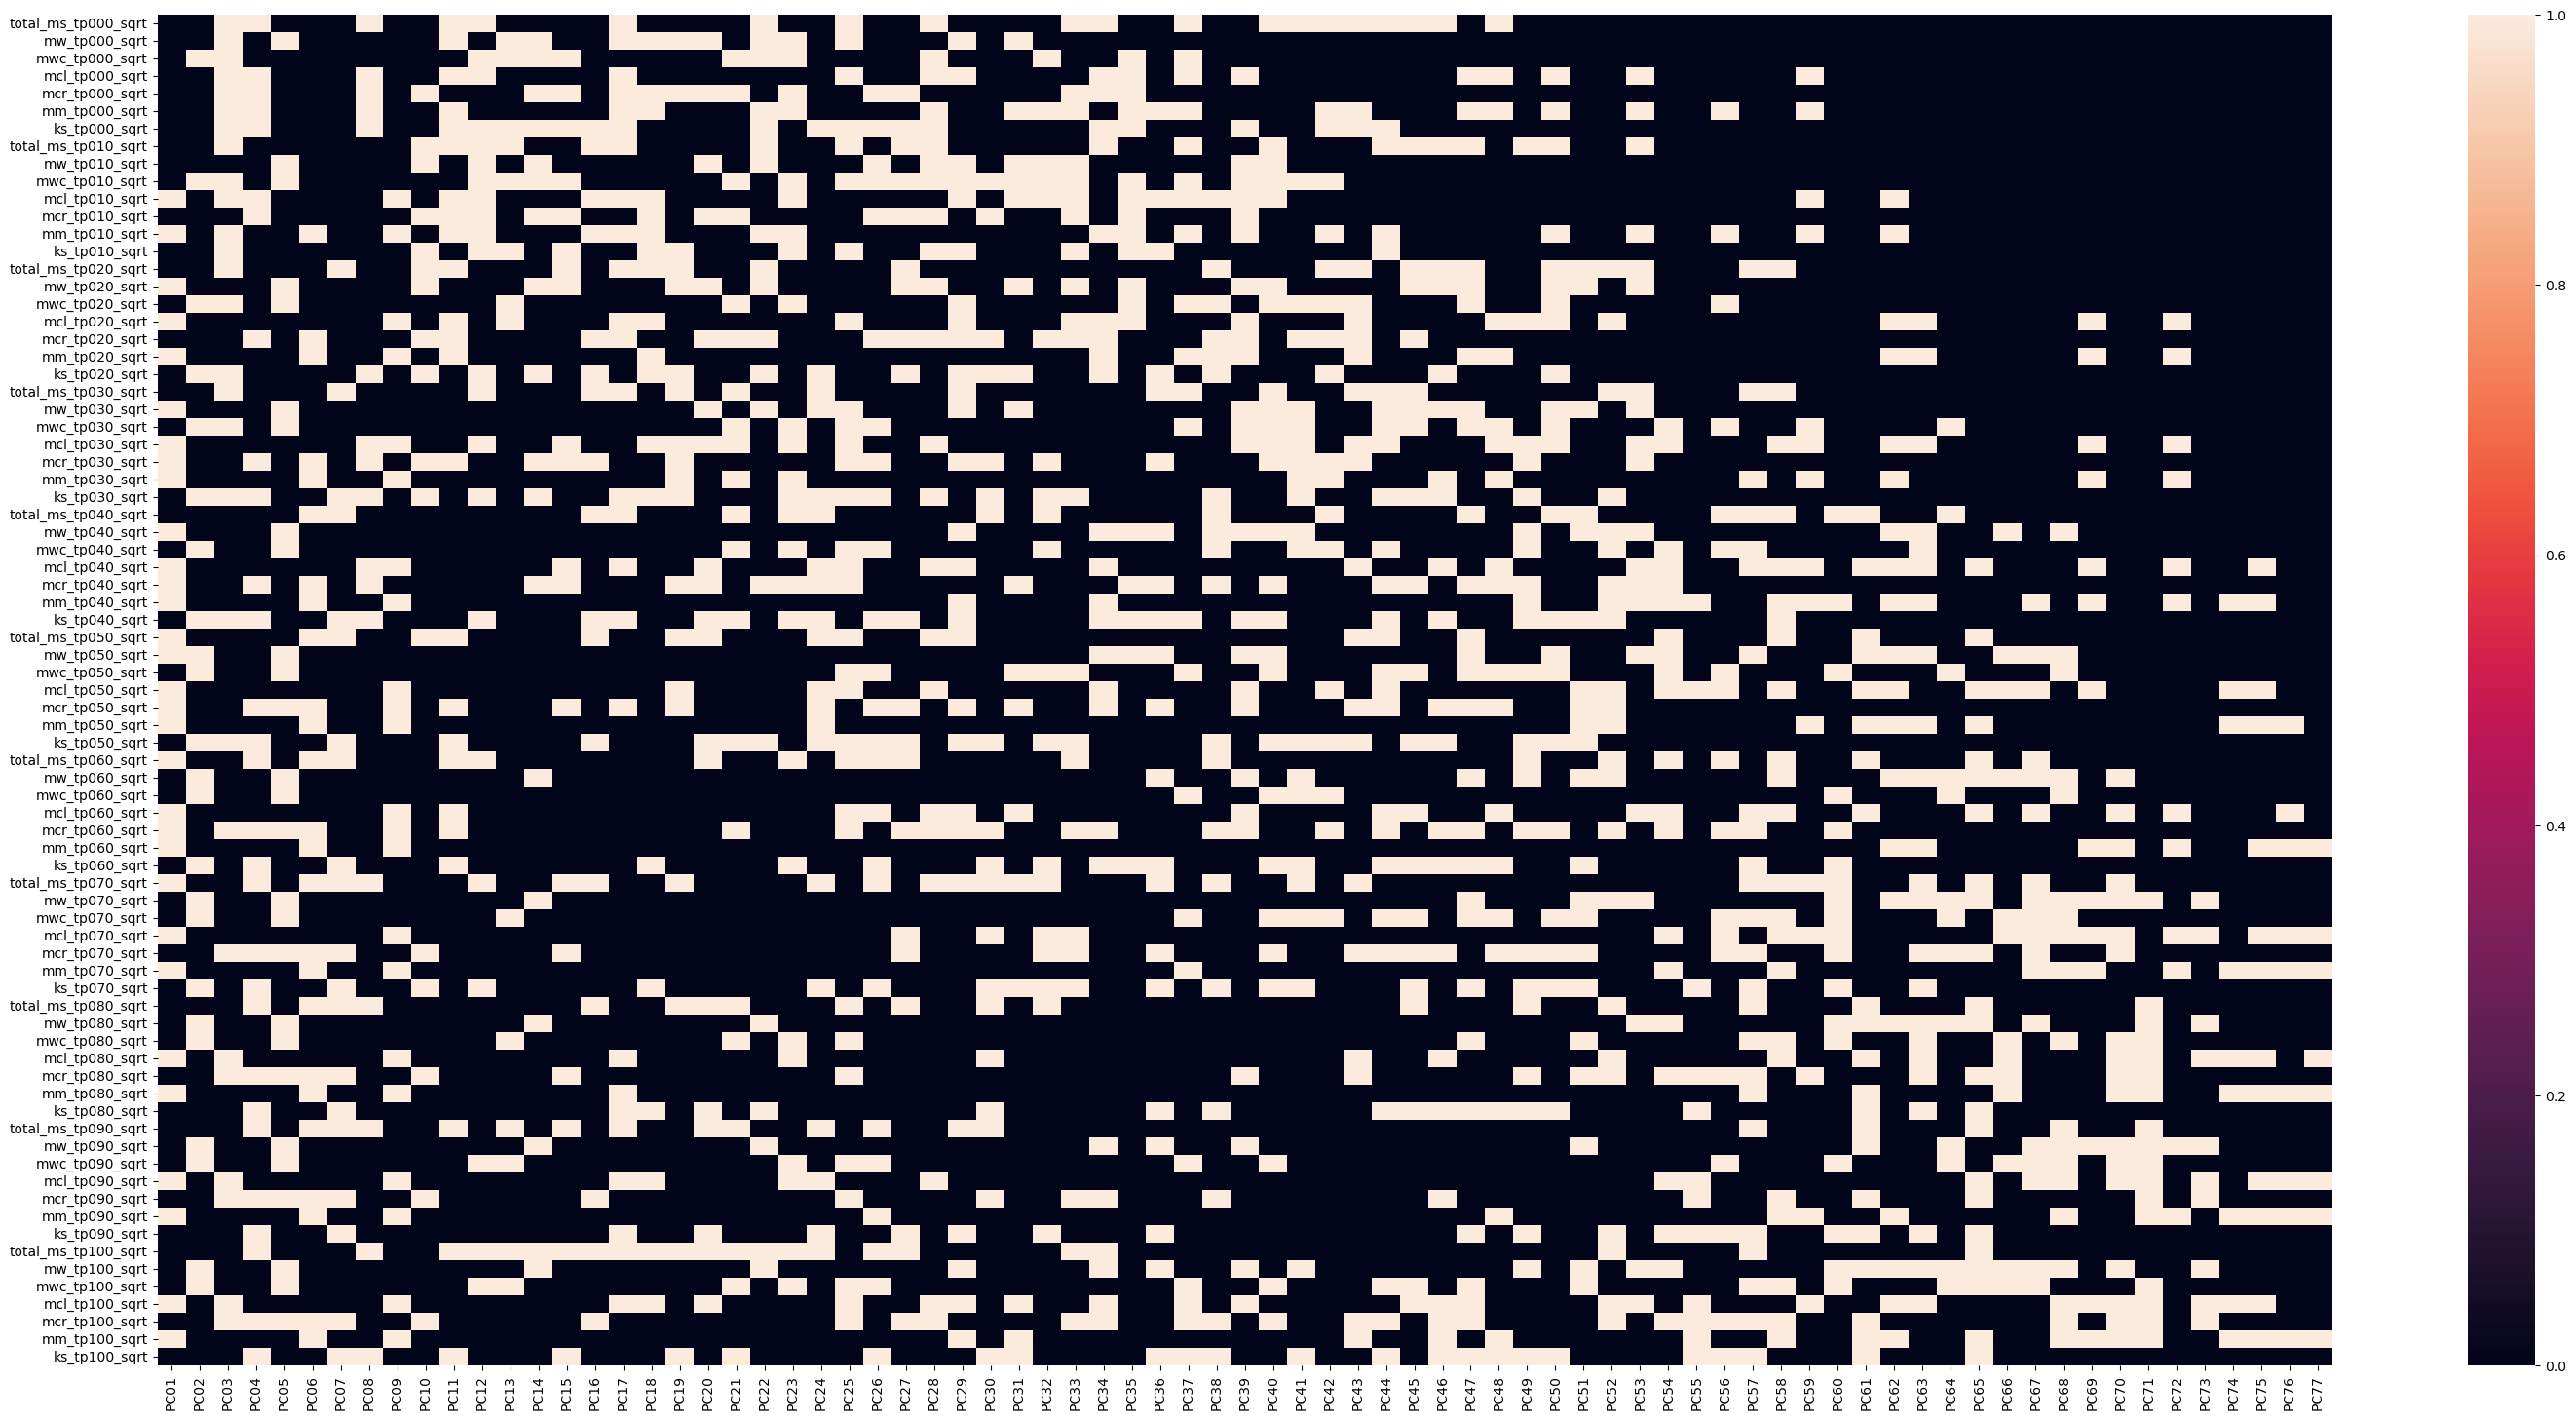

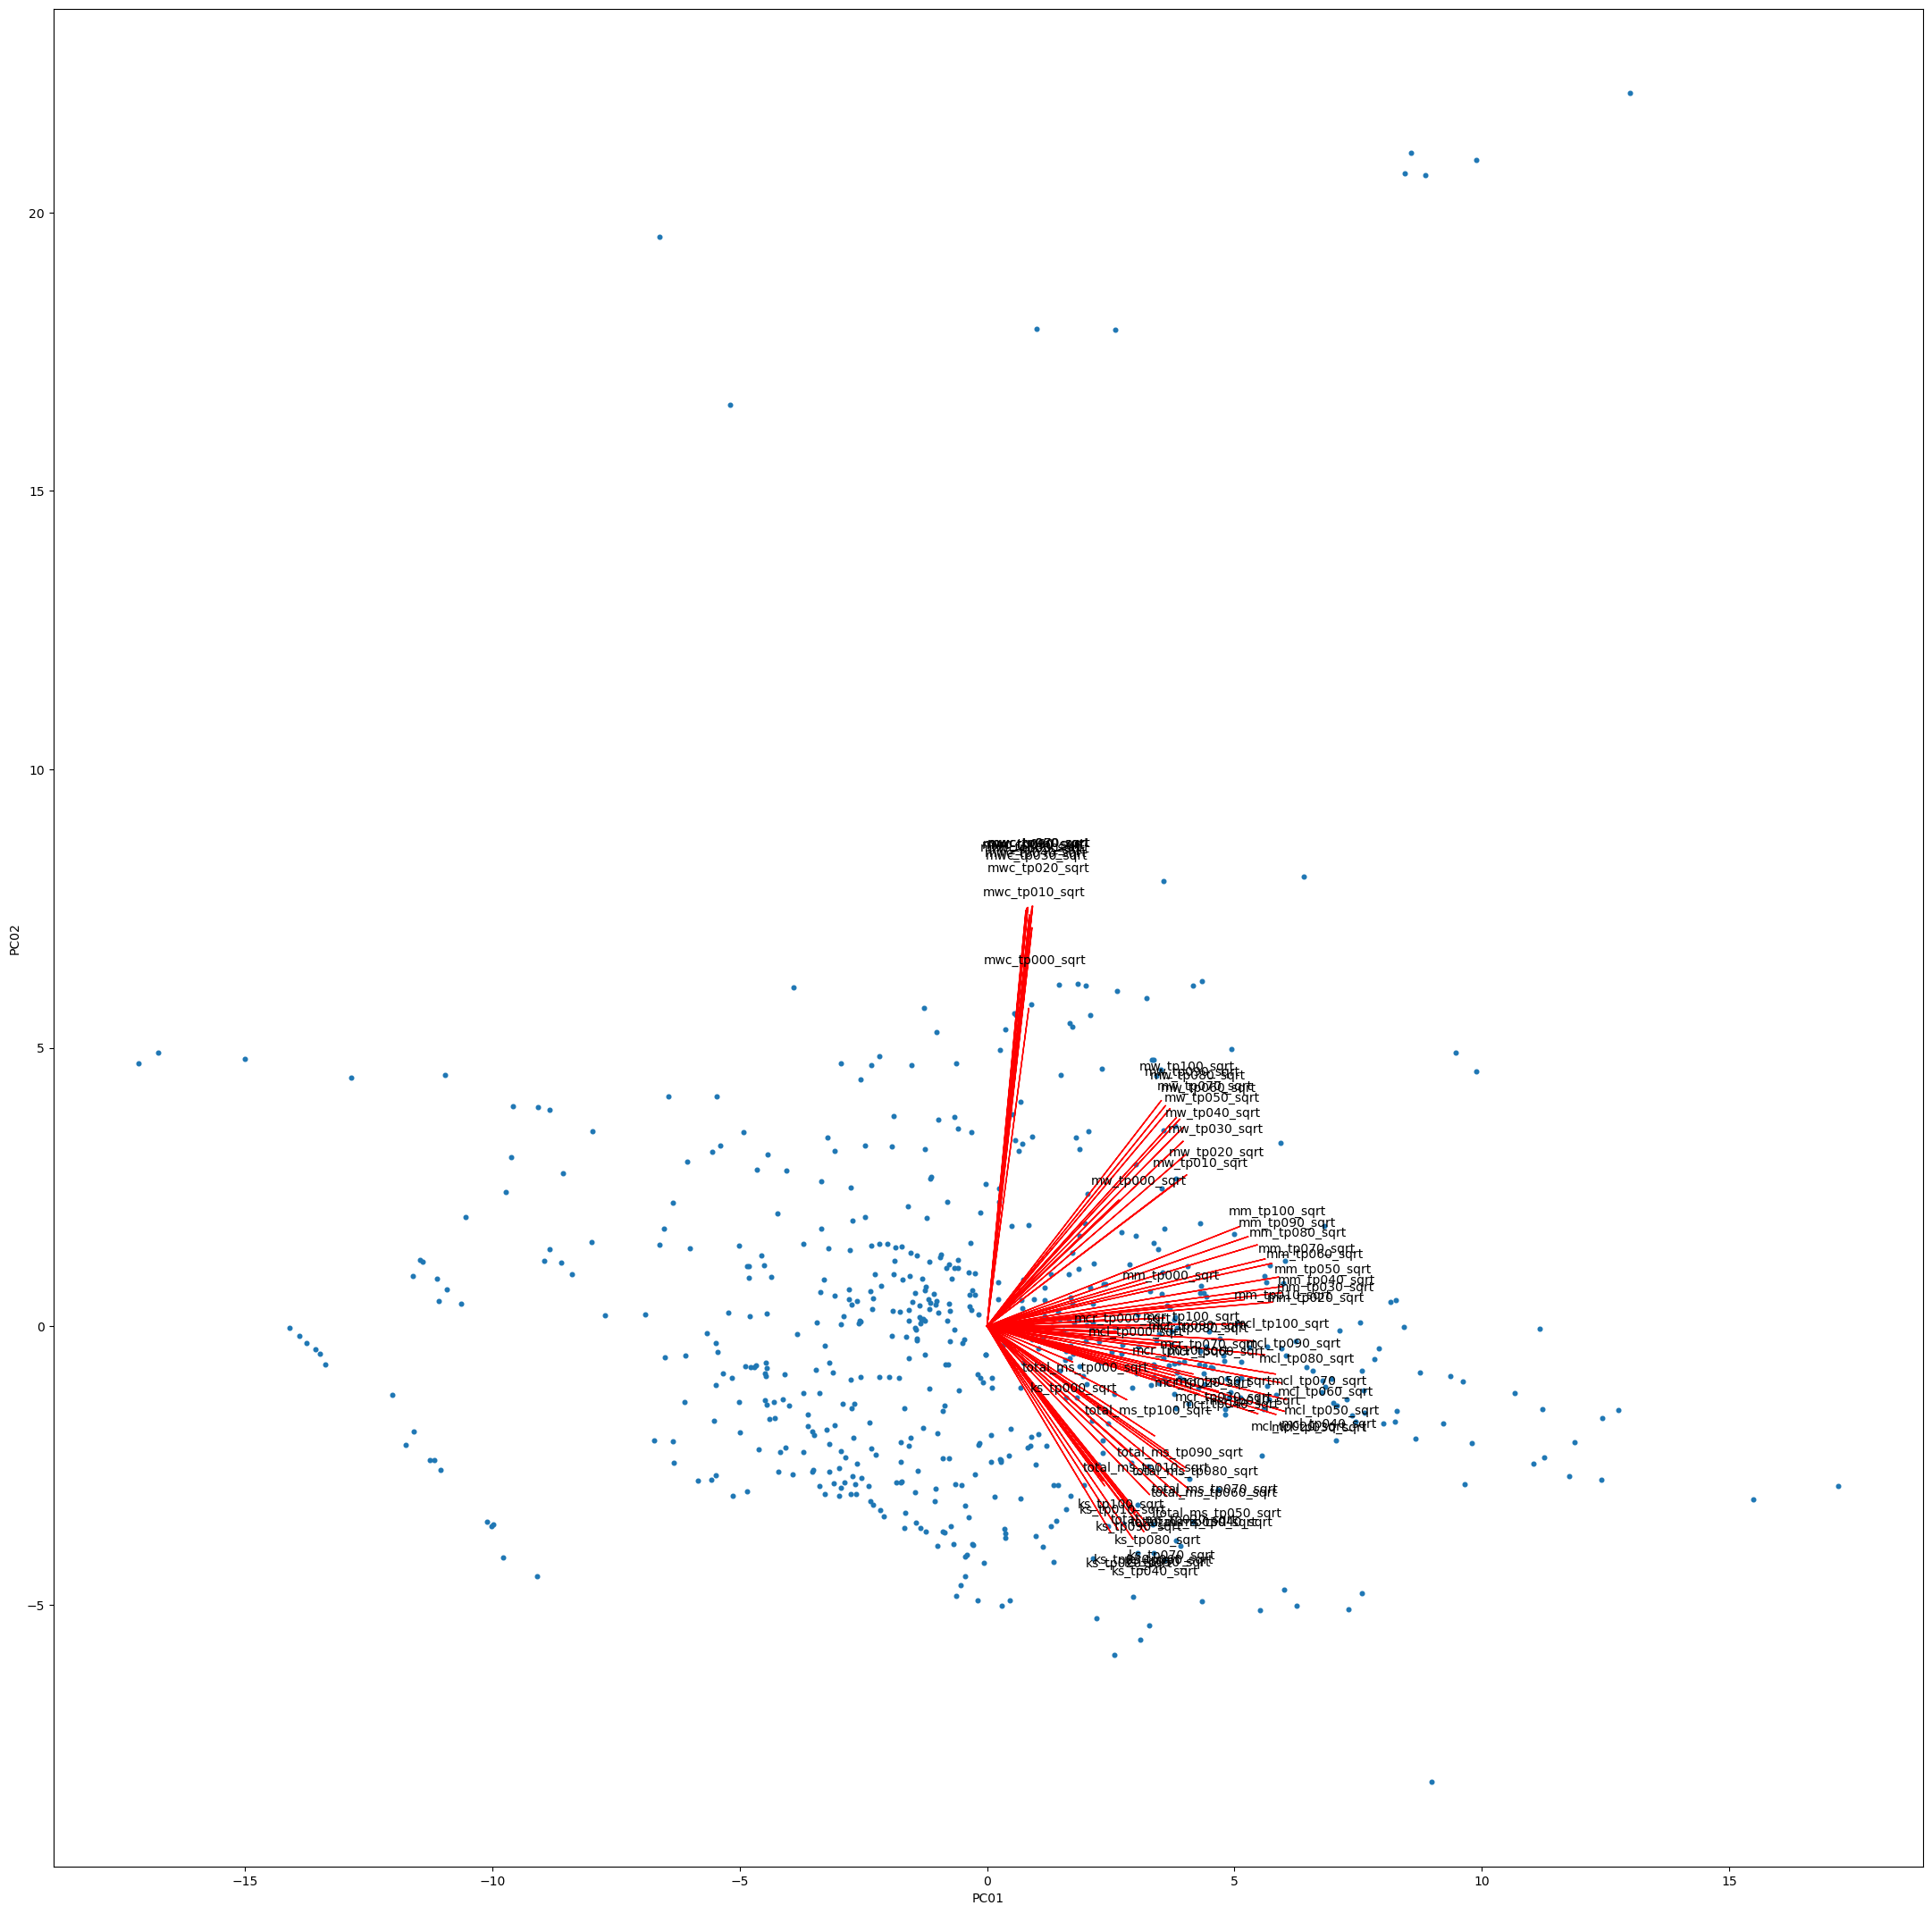

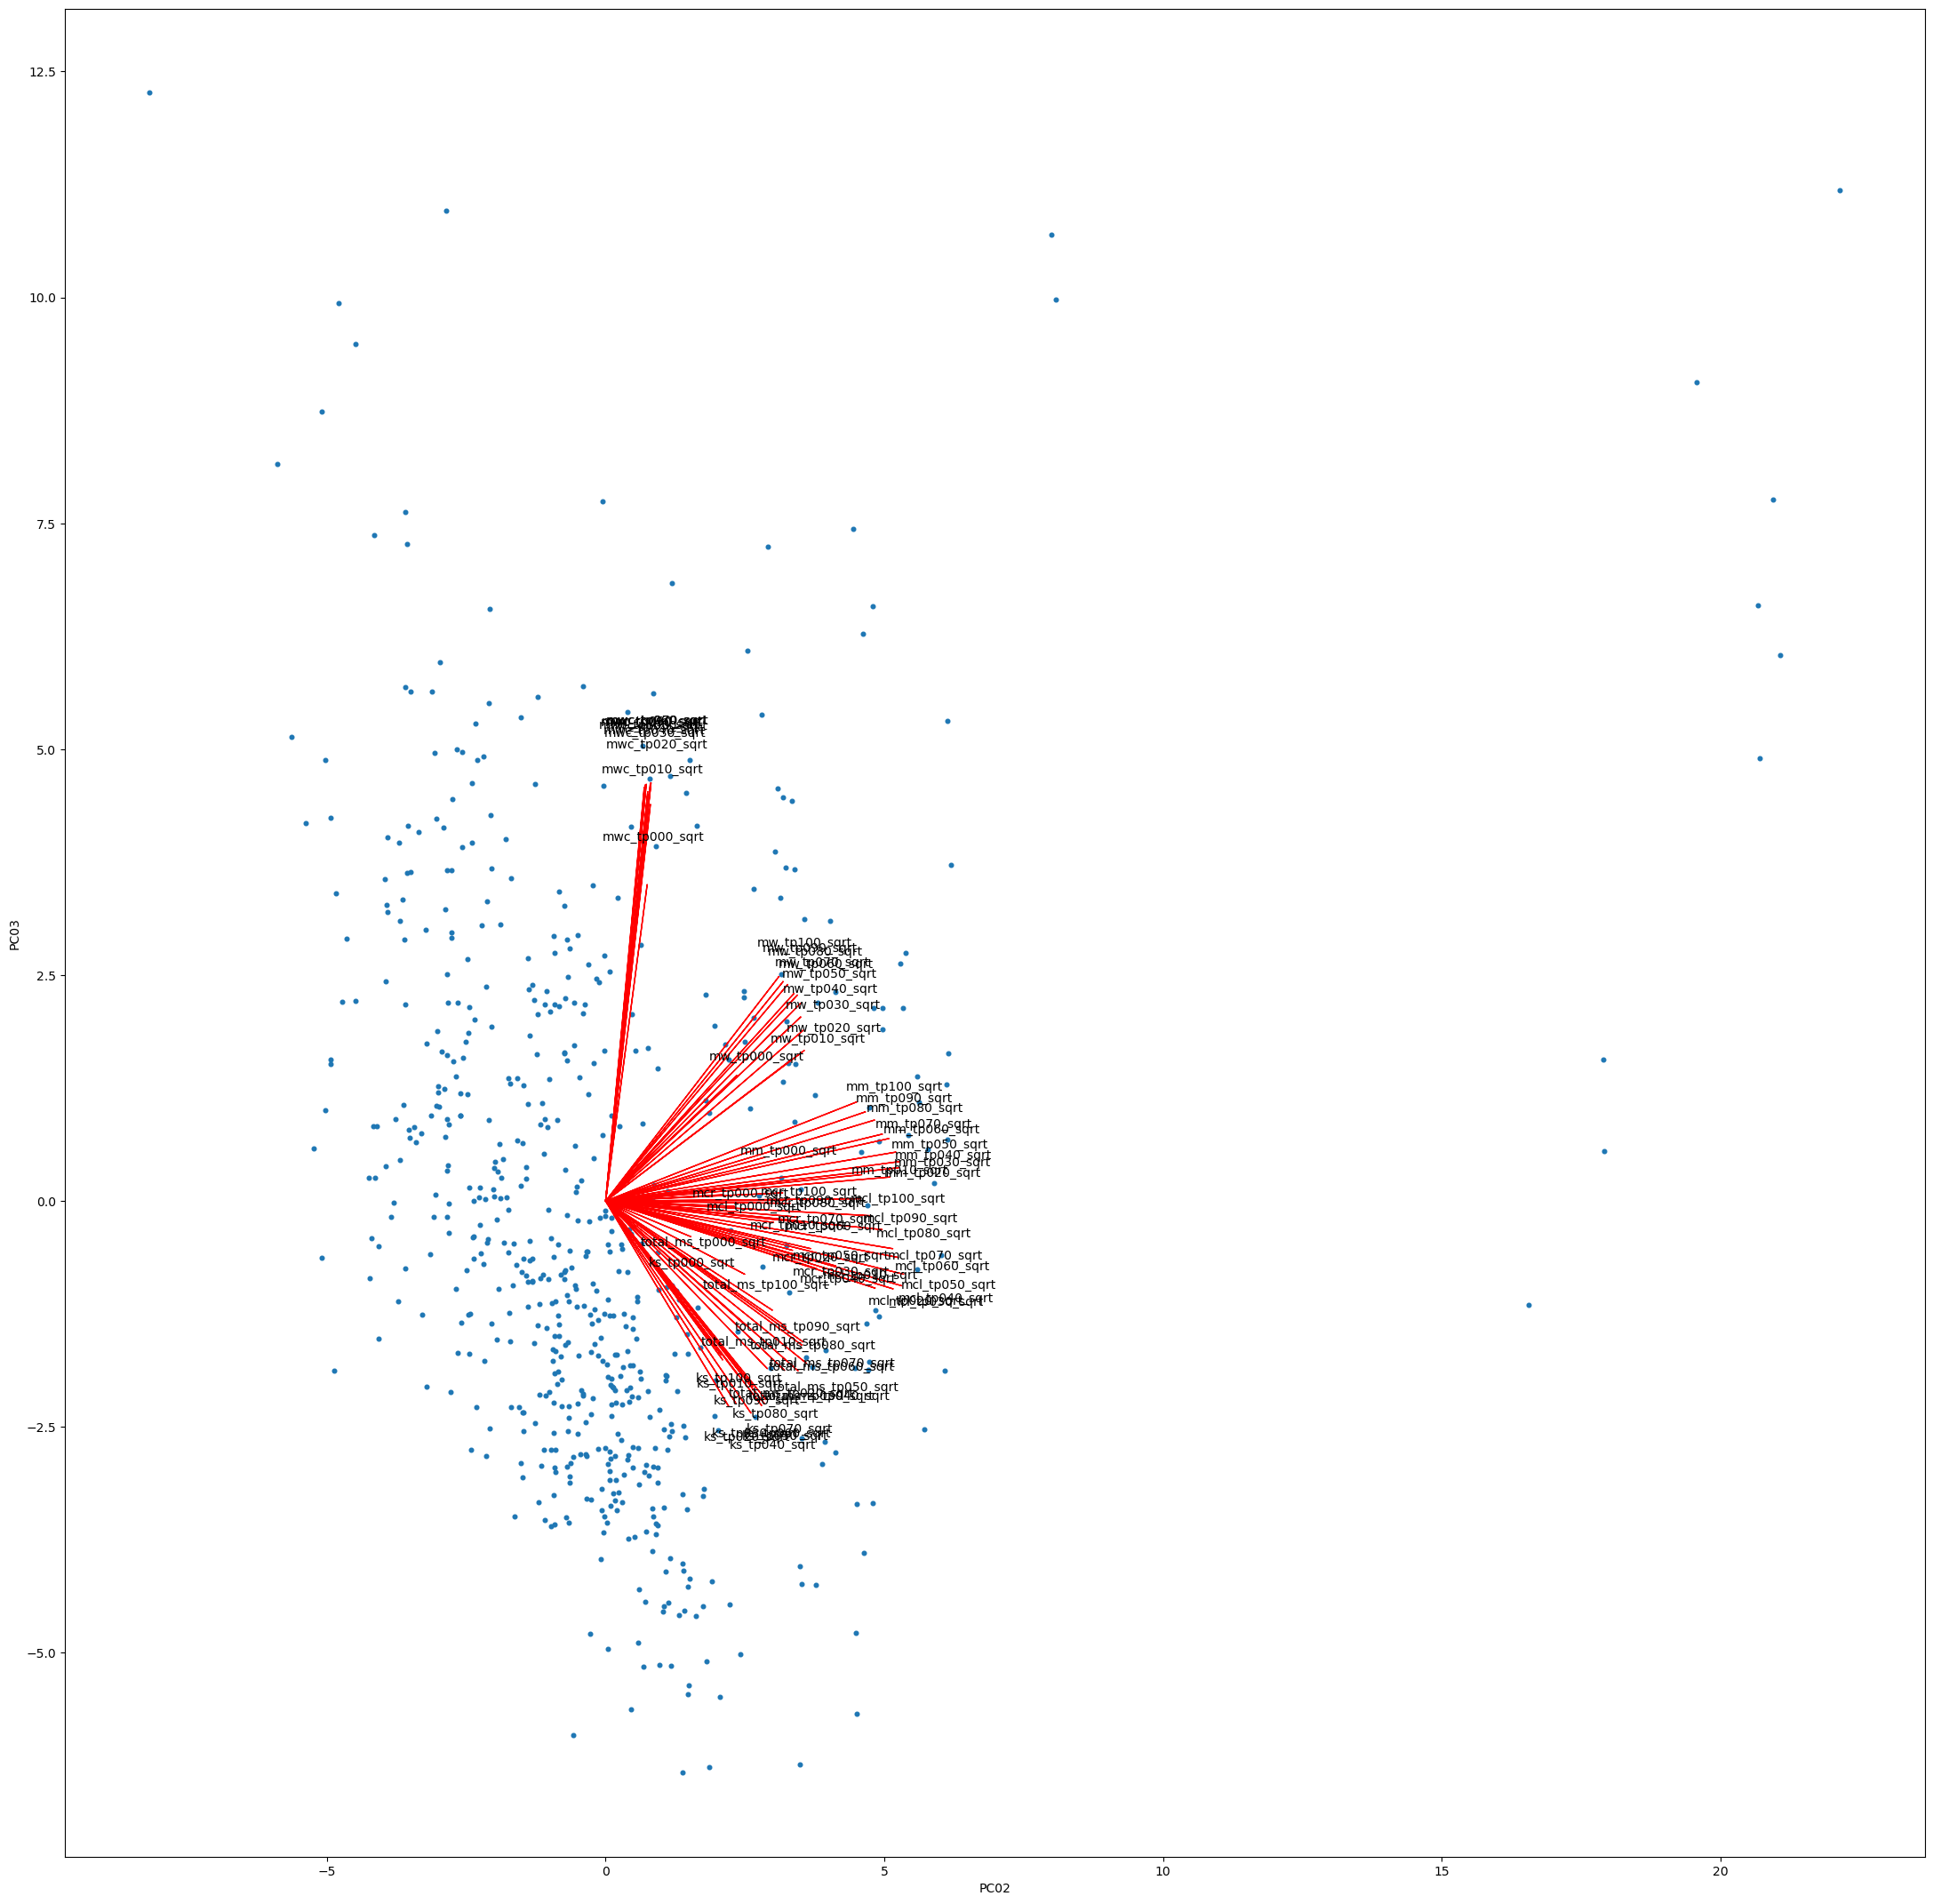

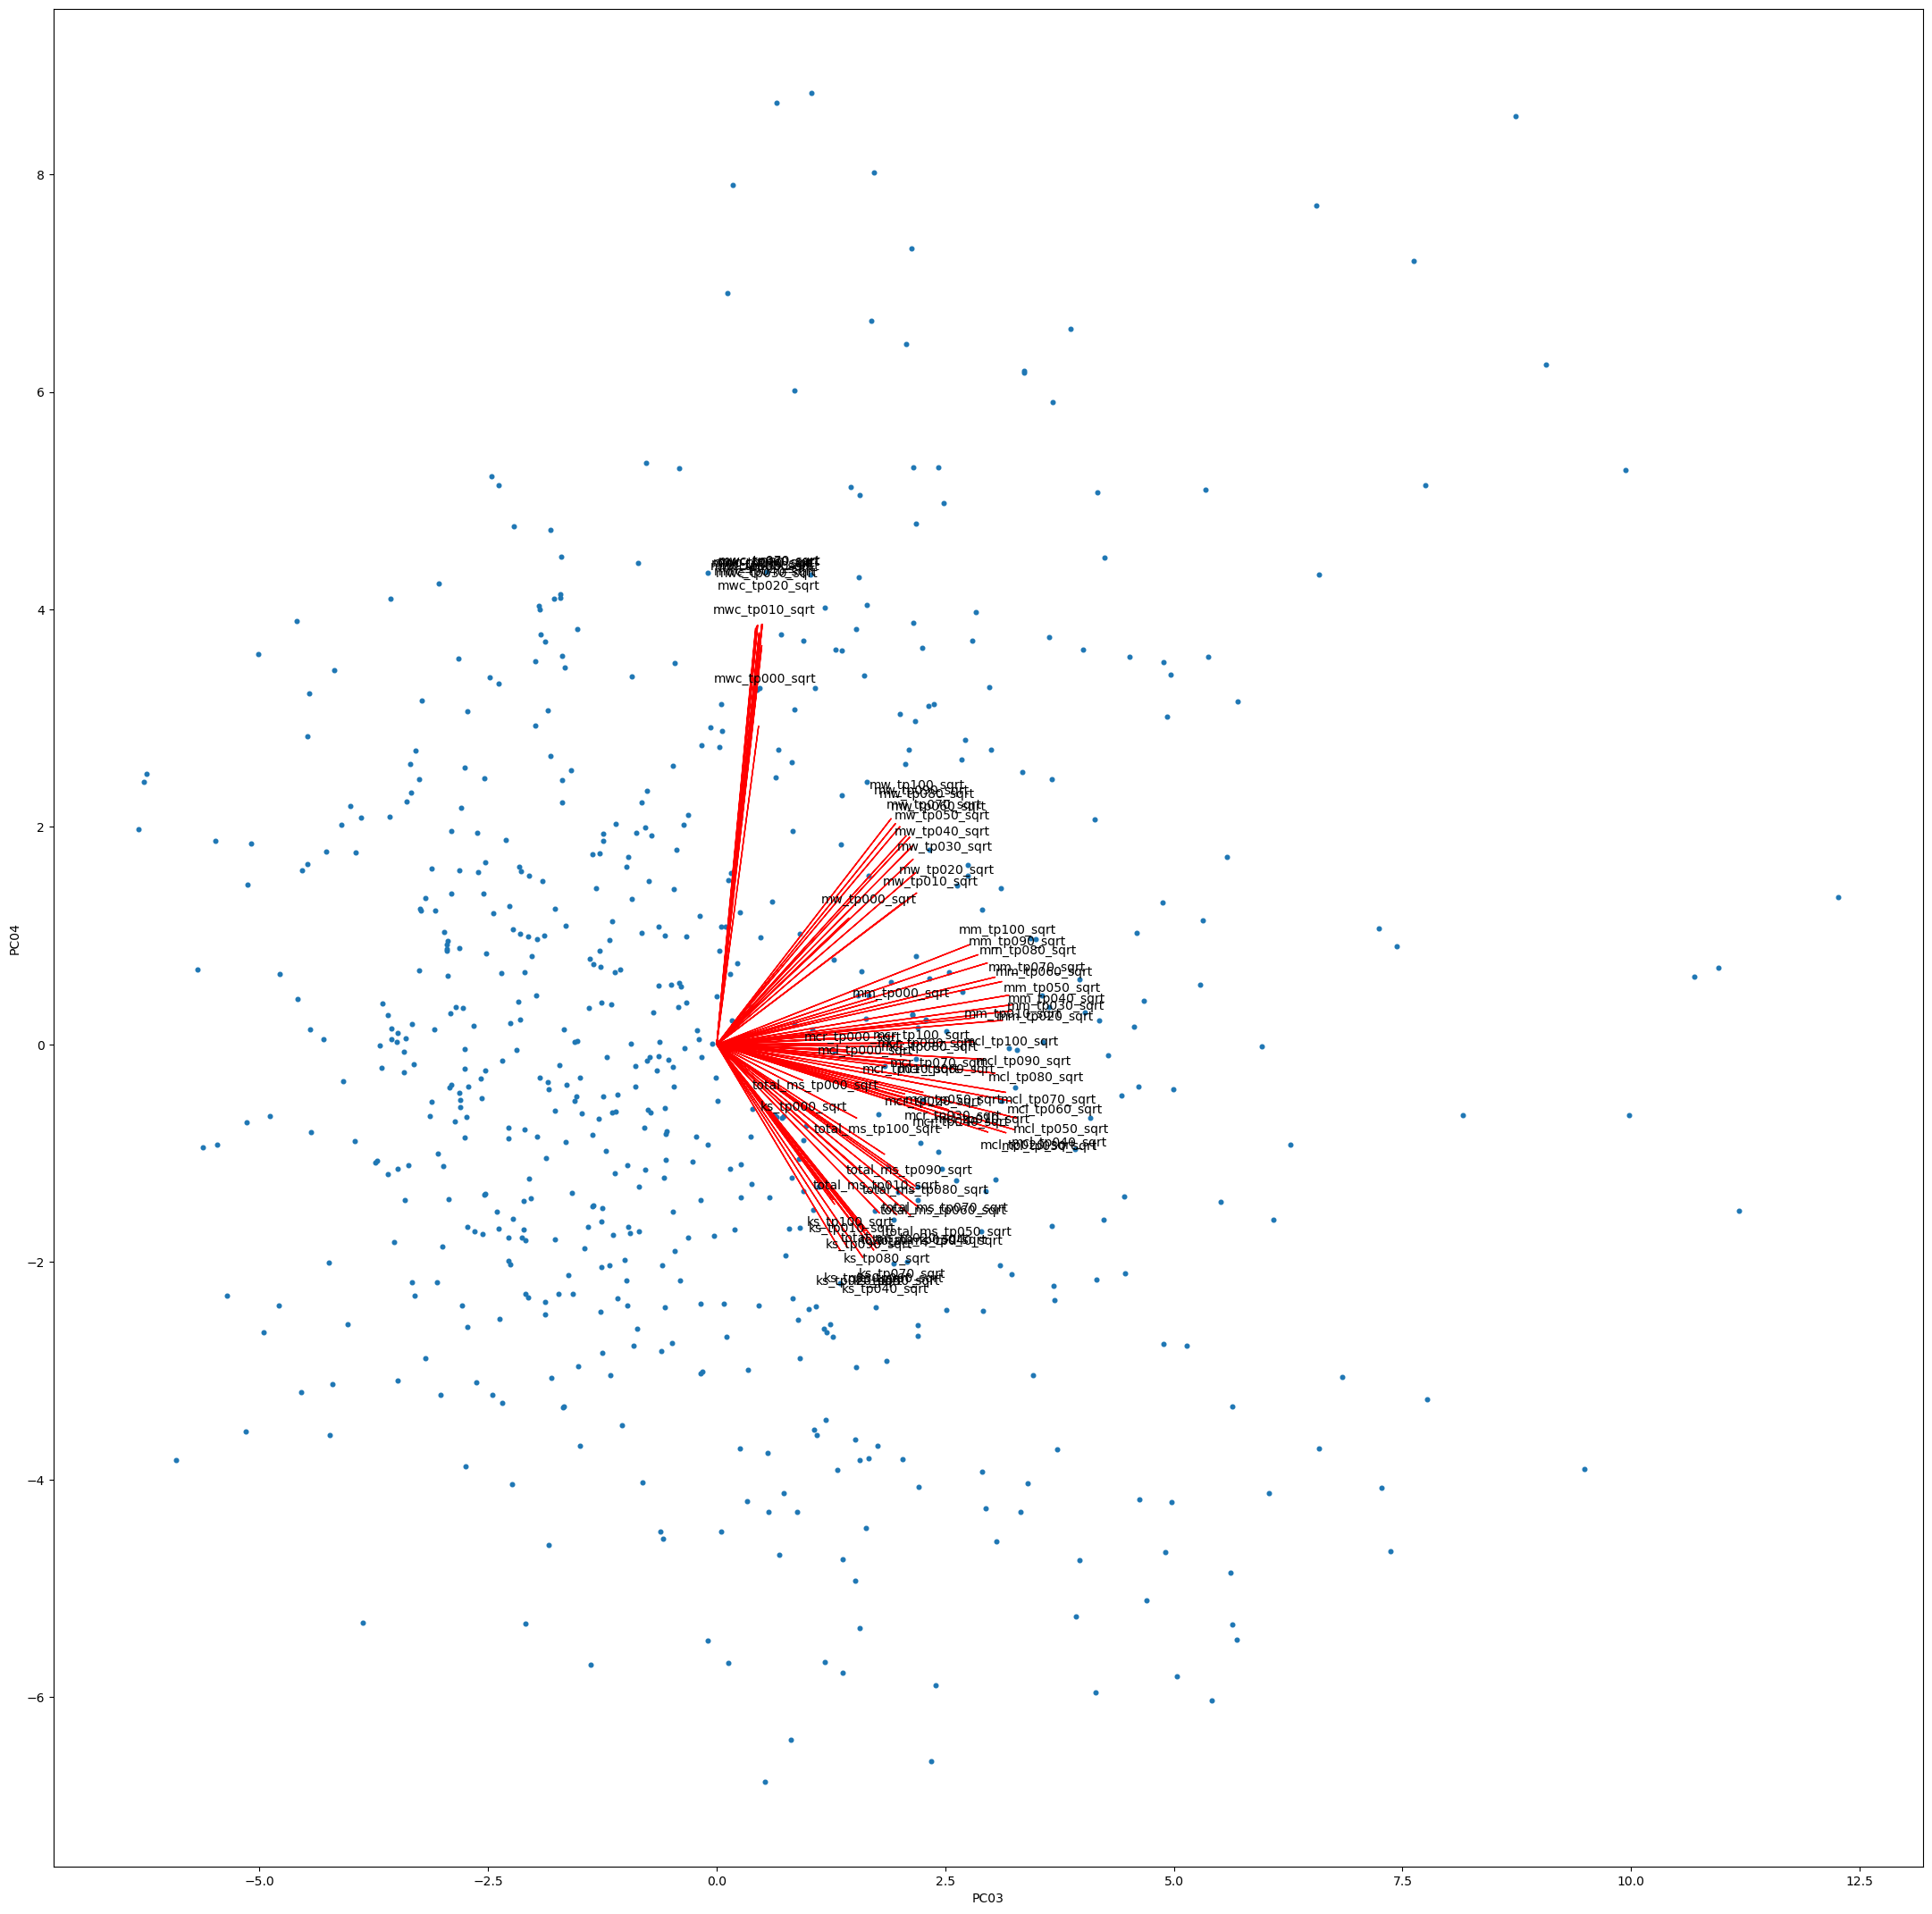

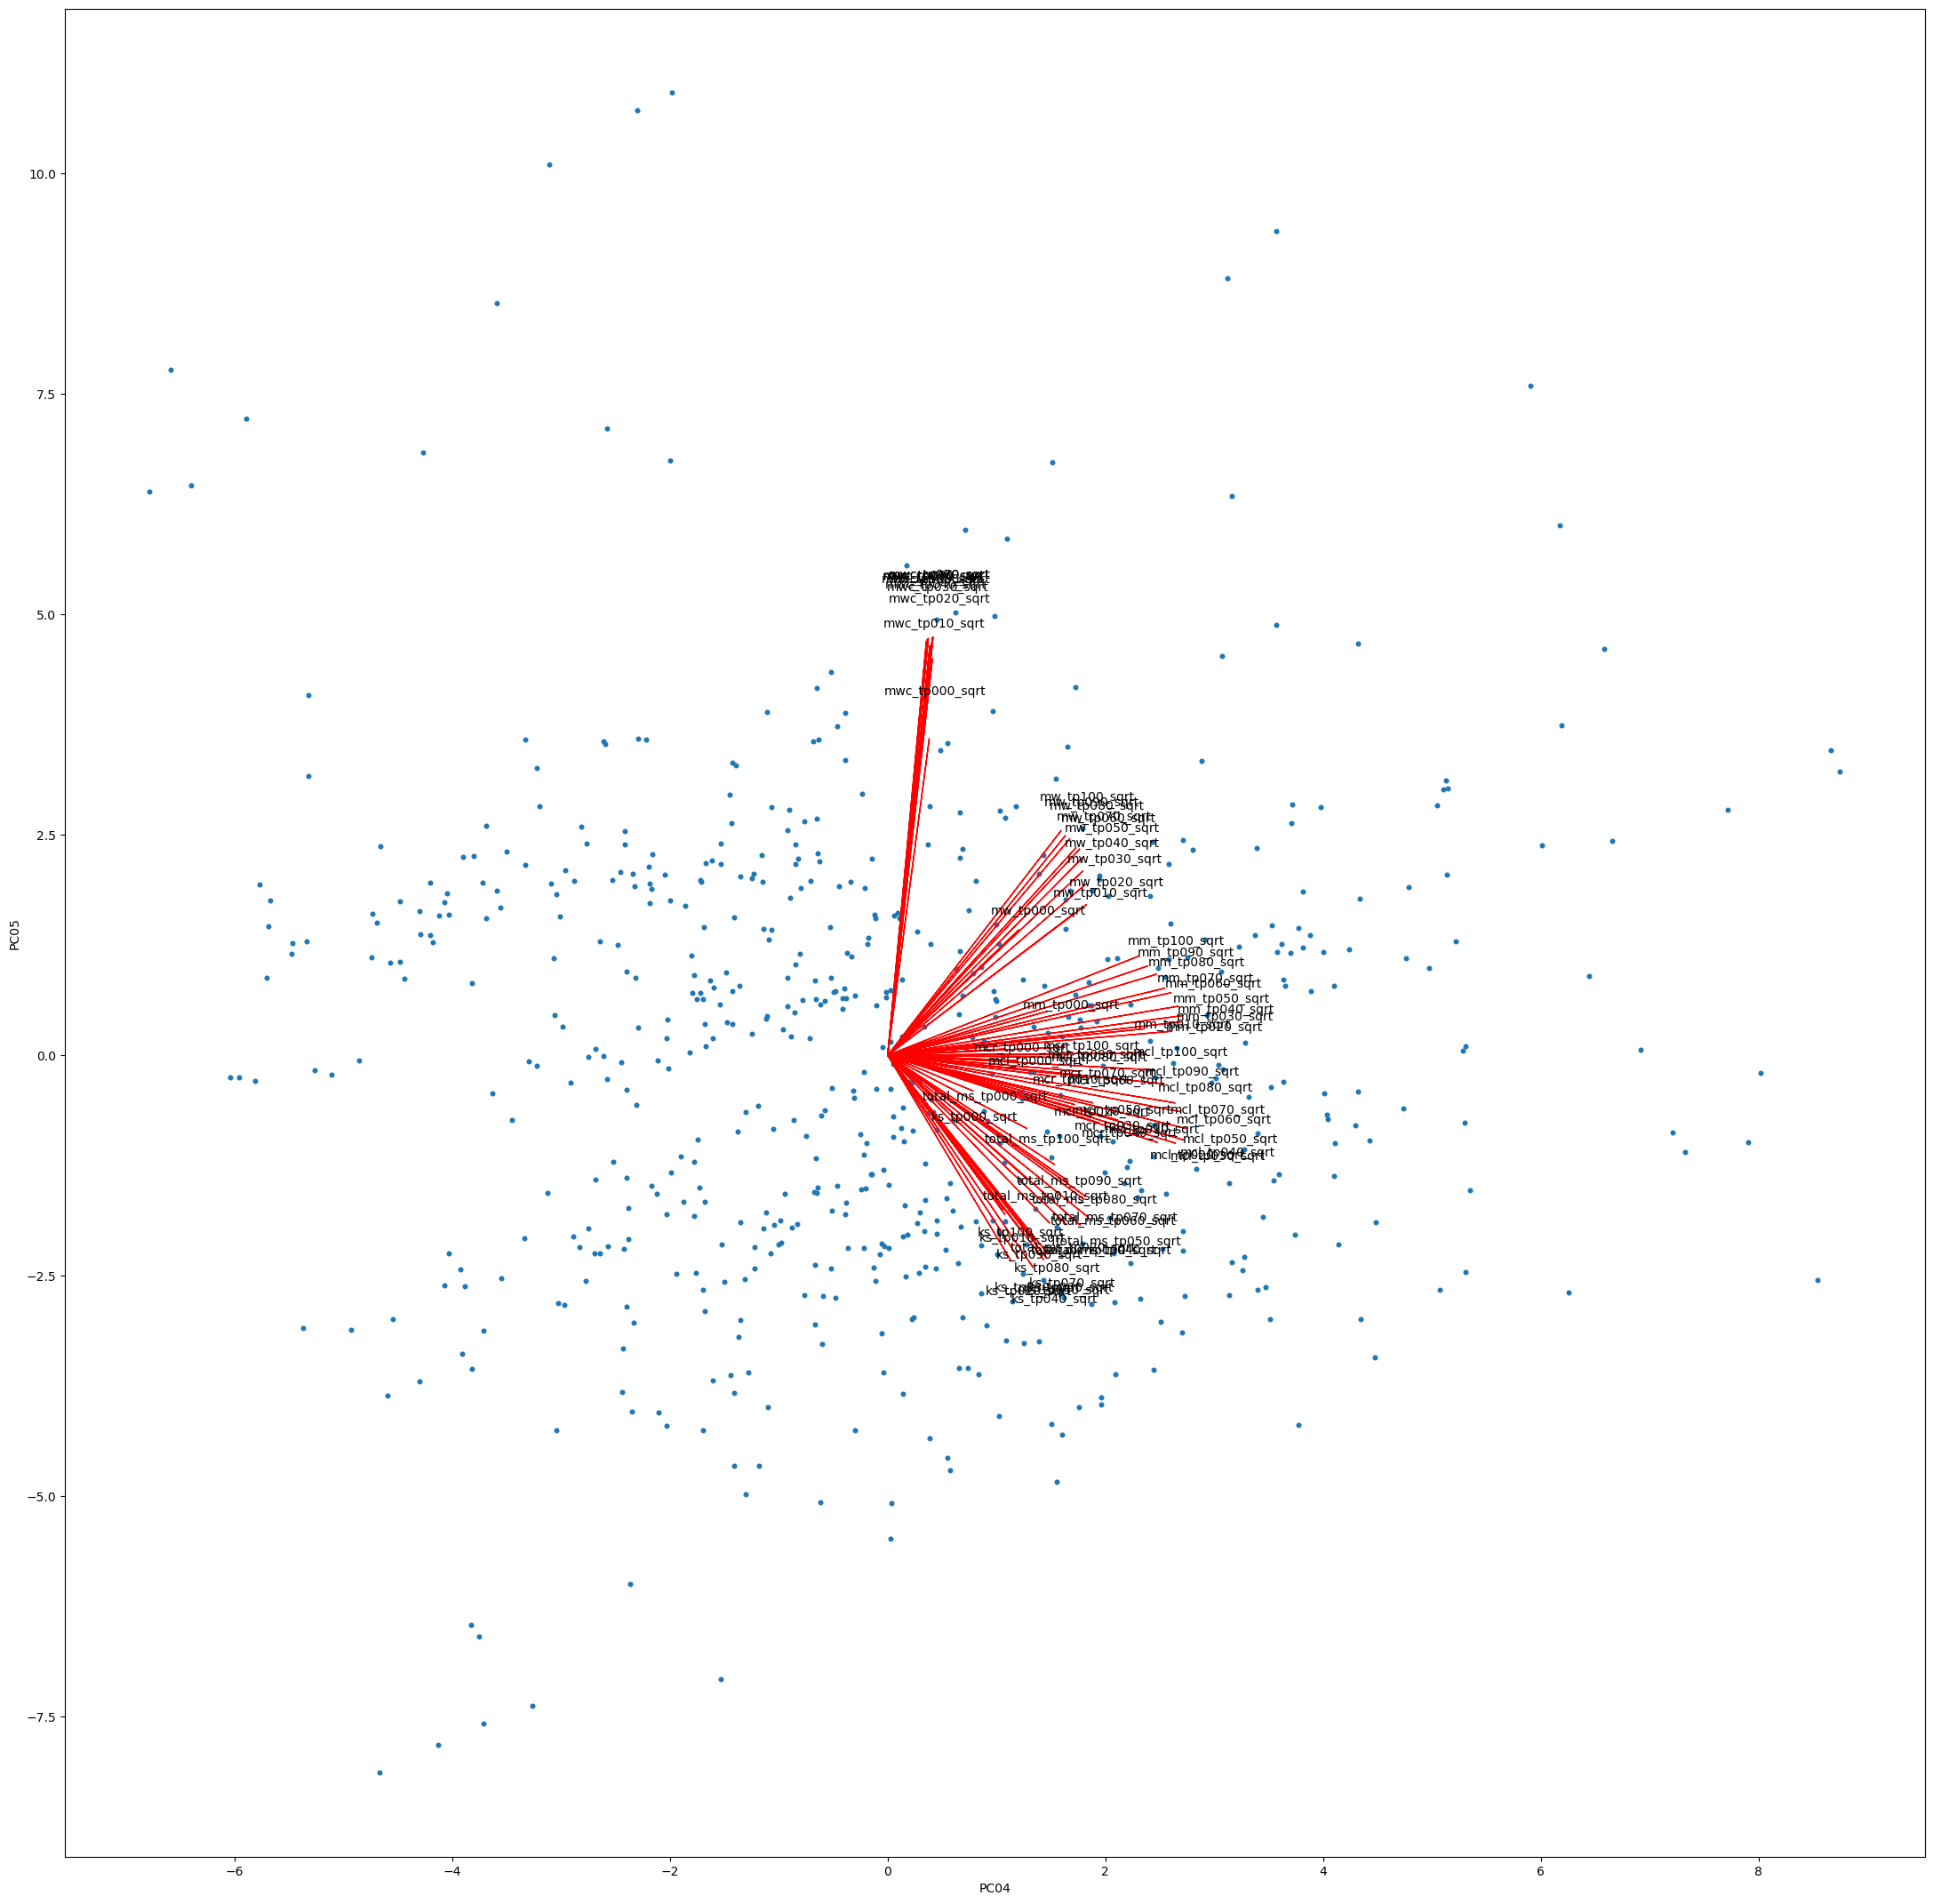

In [30]:
%run CMPINF2120_EPM_PCA_INCL_Over_Lisa.ipynb

In [31]:
pc_scores_select_df = pc_scores_df.copy()

In [32]:
select_Xtimepoints = Xtimepoints.copy()

In [33]:
num_pcs = 12

In [34]:
pc_cluster_df = pd.concat([select_sess_df.loc[:,['sid','actv_grp','interim_pass']].copy(), pc_scores_select_df.copy()], axis=1)

In [35]:
pc_cluster_df.sid = pc_cluster_df.sid.astype('category')

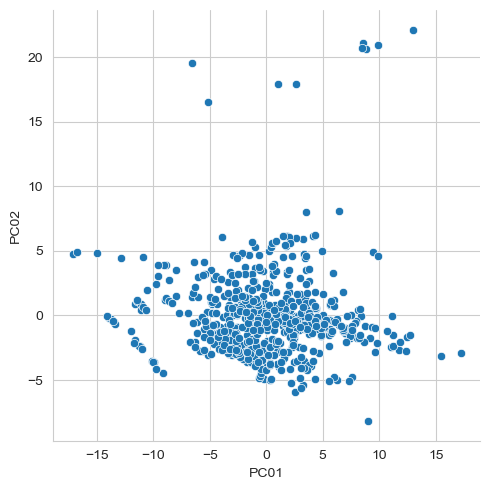

In [36]:
sns.set_style('whitegrid')

sns.relplot(data = pc_cluster_df, x='PC01', y='PC02')

plt.show()

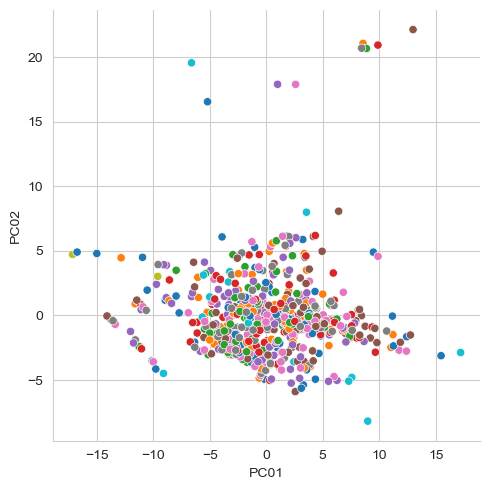

In [37]:
sns.set_style('whitegrid')

sns.relplot(data = pc_cluster_df, x='PC01', y='PC02', hue='actv_grp', legend=False)

plt.show()

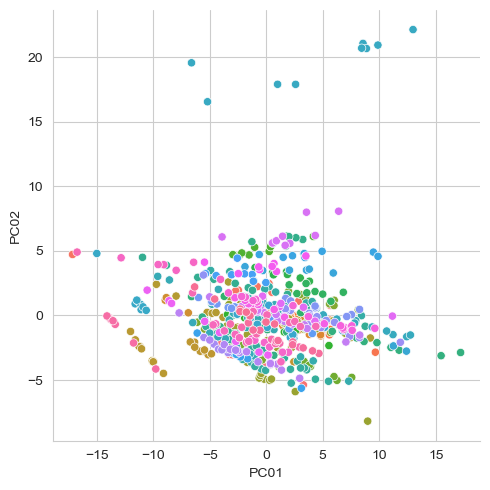

In [38]:
sns.set_style('whitegrid')

sns.relplot(data = pc_cluster_df, x='PC01', y='PC02', hue='sid', legend=False)

plt.show()

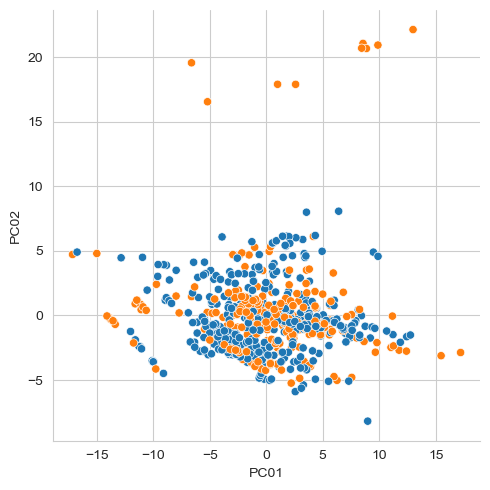

In [39]:
sns.set_style('whitegrid')

sns.relplot(data = pc_cluster_df, x='PC01', y='PC02', hue='interim_pass', legend=False)

plt.show()

#### Calculate the total within sum of squares to identify the "optimal" number of clusters using the 'knee bend, ' i.e., when the total within sum of squares stops dropping significantly.

The optimal number of clusters is 4.

In [40]:
tots_within = []

K = range(1, 31)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500).fit( pc_scores_select_df )
    tots_within.append( km.inertia_ )

In [41]:
pc_scores_12_df = pc_scores_select_df.iloc[:,:12].copy()

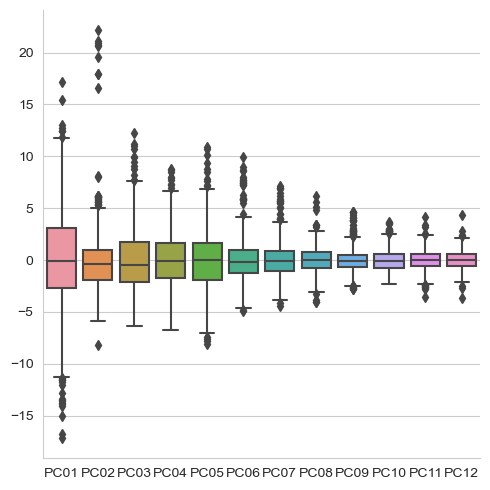

In [42]:
sns.catplot(data = pc_scores_12_df, kind='box')

#### Silhouette Coefficient

The silhouette coefficient shows that 2 clusters are optimal.

In [43]:
sil_coef = []

K = range(2, 31)

for k in K:
    k_label = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500).fit_predict( pc_scores_12_df )
    sil_coef.append( silhouette_score(pc_scores_12_df, k_label) )

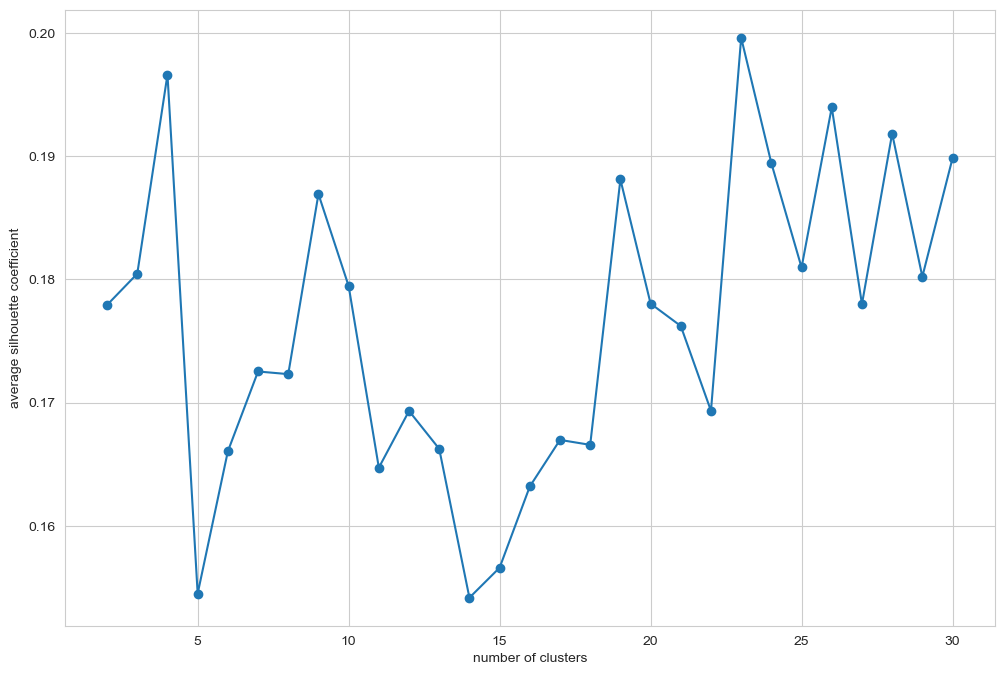

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(K, sil_coef, 'o-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('average silhouette coefficient')

plt.show()

#### Hierarchical clustering Ward method

The optimal number of clusters chosen from the dendrogram is 3 or 8.

In [45]:
hclust_ward = hierarchy.ward( pc_scores_12_df )

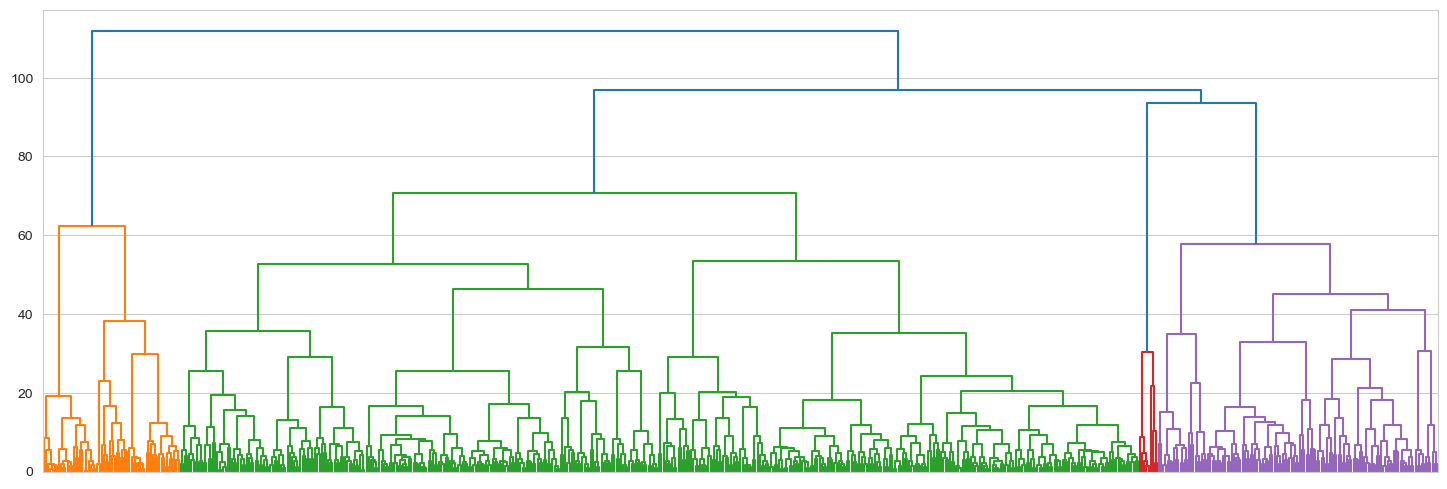

In [46]:
fig = plt.figure( figsize=(18,6) )

dn = hierarchy.dendrogram( hclust_ward, no_labels=True )

plt.show()

In [47]:
ward_cut_a = hierarchy.cut_tree( hclust_ward, n_clusters=12 )

In [48]:
ward_cut_a0 = hierarchy.cut_tree( hclust_ward, n_clusters=5 )

In [49]:
ward_cut_a.shape

(653, 1)

In [50]:
type( ward_cut_a )

numpy.ndarray

In [51]:
ward_cut_a.ravel()

array([ 0,  1,  1,  1,  1,  0,  1,  1,  2,  3,  3,  3,  3,  2,  2,  3,  2,
        3,  3,  3,  3,  2,  2,  3,  4,  4,  4,  4,  5,  1,  4,  4,  4,  6,
        6,  1,  6,  6,  0,  6,  6,  6,  6,  1,  0,  1,  0,  1,  1,  6,  1,
        1,  1,  1,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  0,  1,  1,  1,
        1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  5,  3,  3,
        3,  5,  3,  5,  3,  1,  1,  1,  1,  1,  0,  1,  1,  2,  3,  3,  3,
        3,  2,  3,  2,  3,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  5,  3,  3,  3,  5,  3,  2,  3,  9,  9,  9,  9,
        9,  9,  1,  1,  1,  1,  1,  0,  1,  5,  1,  7,  7,  7,  7,  7,  0,
        7,  7,  1,  1,  1,  1,  1,  0,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        0,  2,  7, 10, 10,  7, 10, 10, 10,  3,  3,  3,  3,  3,  2,  3,  3,
        1,  6,  6,  1,  6,  1,  6,  2,  2,  3,  3,  3,  2,  3,  2,  2,  2,
        2,  2,  2,  2,  0,  2,  1,  1,  1,  0,  1,  1,  1,  1,  4,  4,  4,
        4,  4,  4,  4,  4

In [52]:
pc_scores_12_df.index

RangeIndex(start=0, stop=653, step=1)

#### Add Ward hierarchical clustering labels to the PC dataframe and visualize.

In [53]:
pc_scores_12_df['hclust_a'] = pd.Series( ward_cut_a.ravel(), index=pc_scores_12_df.index )

pc_scores_12_df['hclust_a'] = pc_scores_12_df.hclust_a.astype('category')

In [54]:
pc_scores_12_df['hclust_a0'] = pd.Series( ward_cut_a0.ravel(), index=pc_scores_12_df.index )

pc_scores_12_df['hclust_a0'] = pc_scores_12_df.hclust_a0.astype('category')

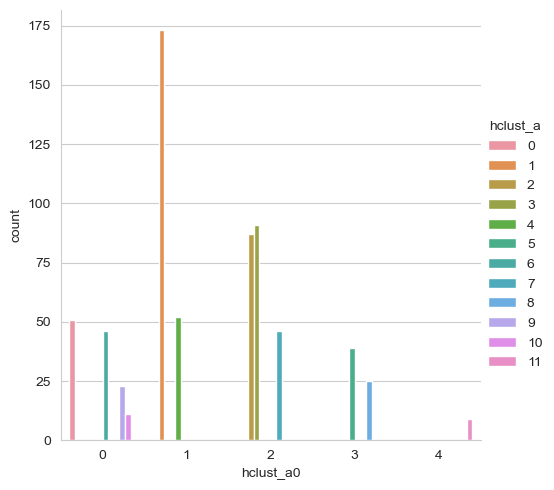

In [55]:
sns.catplot(data = pc_scores_12_df, x='hclust_a0', hue='hclust_a', kind='count')

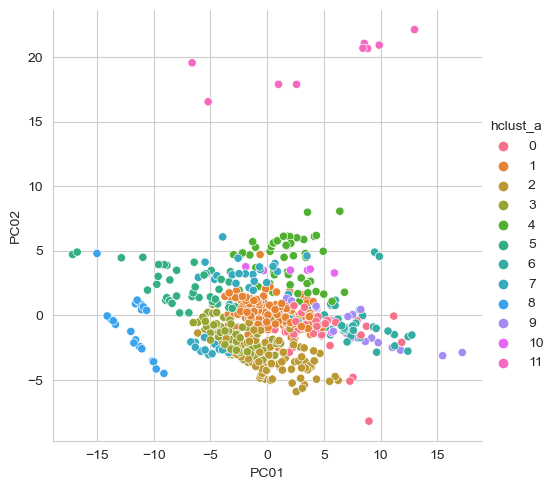

In [56]:
sns.relplot(data = pc_scores_12_df, x='PC01', y='PC02', hue='hclust_a')

plt.show()

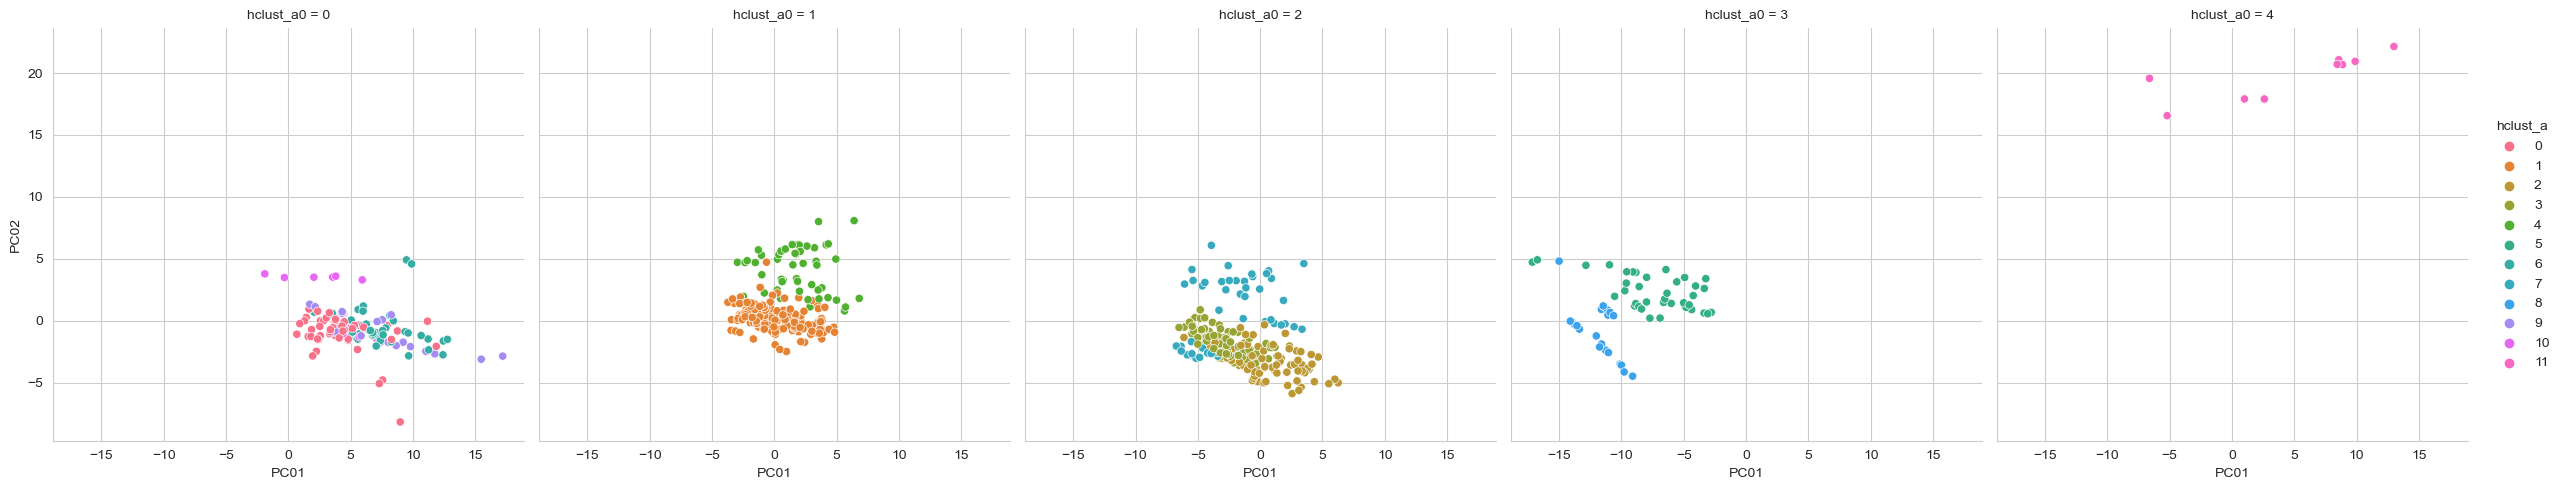

In [57]:
sns.relplot(data = pc_scores_12_df, x='PC01', y='PC02', col='hclust_a0', hue='hclust_a')

plt.show()

#### Add `select_sess_df` to `pc_cluster_df` dataset (merge).

In [58]:
pc_scores_outp_df = pd.concat([select_sess_df.loc[:,['sid','actv_grp','interim_pass']].copy(), pc_scores_12_df.copy()], axis=1)

In [59]:
pc_scores_outp_df.head()

,sid,actv_grp,interim_pass,PC01,PC02,PC03,PC04,PC05,PC06,PC07,PC08,PC09,PC10,PC11,PC12,hclust_a,hclust_a0
0,1,Aulaweb,1.0,4.696728,-0.217543,1.523679,3.816703,1.855665,1.192844,0.205416,-0.605668,0.077515,-1.237570,-0.467555,0.102760,0,0
1,1,Blank,1.0,1.851483,0.108764,-1.962132,0.971797,0.728020,1.277528,0.368094,0.547836,0.243289,-1.992564,0.580493,0.122270,1,1
2,1,Deeds,1.0,1.752744,0.066318,-2.772918,0.333047,0.325769,1.119129,0.497290,0.428038,0.289876,-1.850254,0.133520,0.414914,1,1
3,1,Diagram,1.0,4.776729,-0.529619,-0.972399,1.725558,0.686277,0.577979,0.683349,-0.344691,0.340548,-1.346820,0.465911,0.798300,1,1
4,1,Other,1.0,3.481437,-0.138485,-1.318605,1.436803,0.790349,1.019270,0.502882,-0.531409,0.217946,-1.741124,-0.777373,-0.243610,1,1


In [60]:
pc_scores_outp_df.interim_pass.mean()

0.41960183767228176

#### Number of observations per cluster

In [61]:
pc_scores_outp_df.hclust_a.value_counts().reset_index()

,index,hclust_a
0,1,173
1,3,91
2,2,87
3,4,52
4,0,51
5,6,46
6,7,46
7,5,39
8,8,25
9,9,23


In [62]:
pc_scores_outp_df.hclust_a0.value_counts().reset_index()

,index,hclust_a0
0,1,225
1,2,224
2,0,131
3,3,64
4,4,9


#### Compare hierarchical clusters to dichotomous variable binary_outcome (yes/1 if passed intermediate evaluation for the select session).

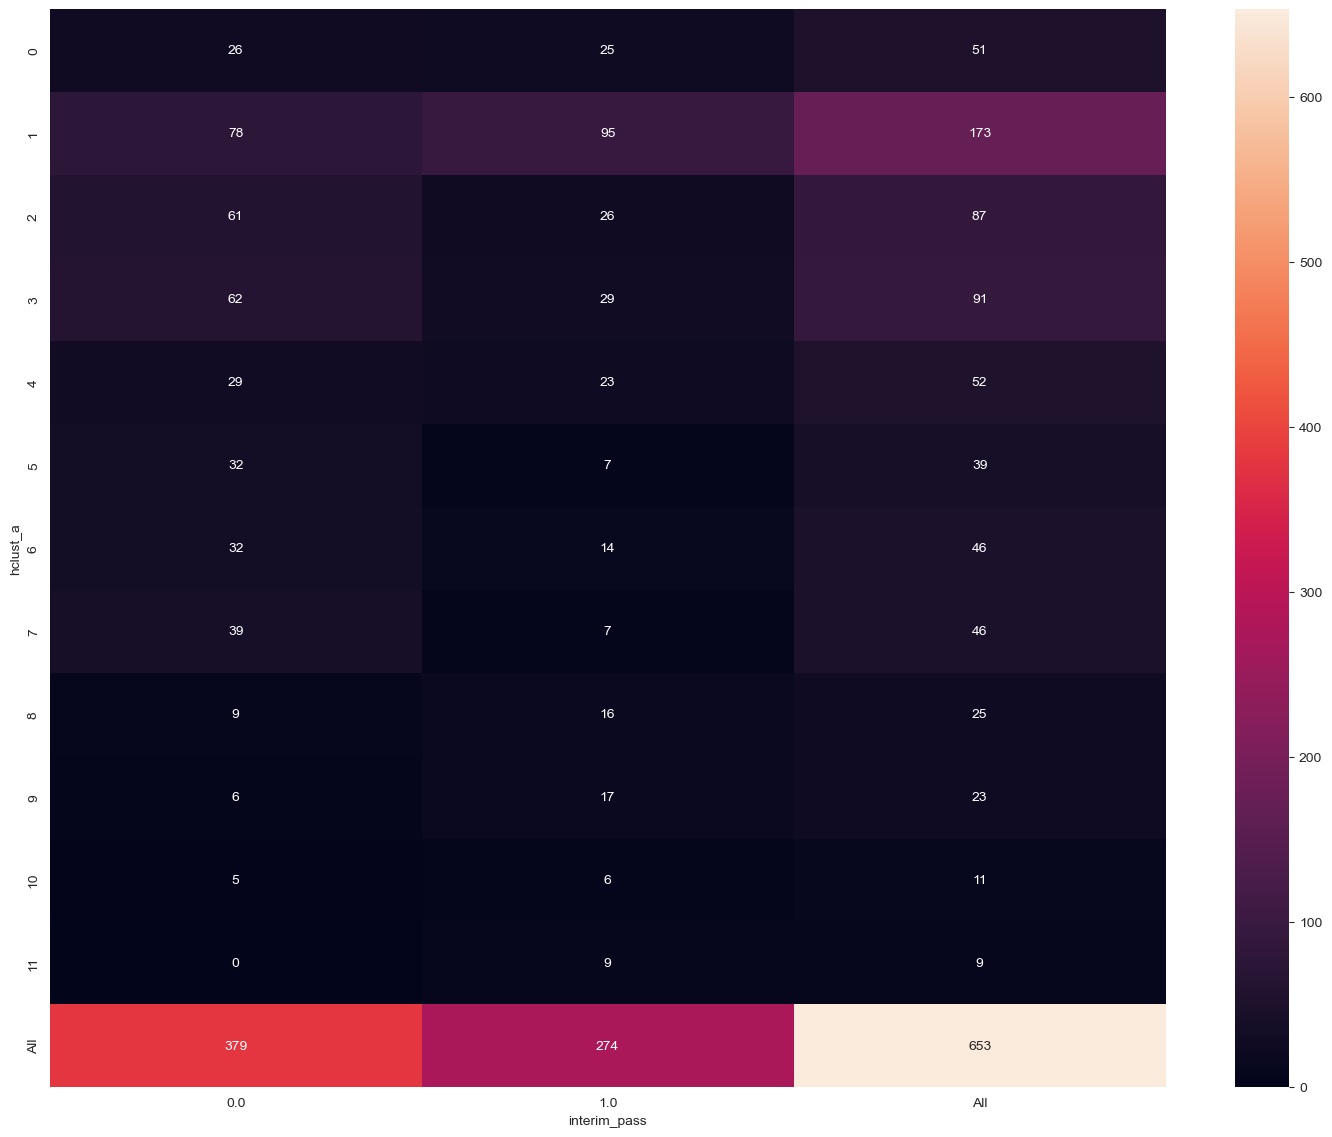

In [63]:
fig, ax = plt.subplots(figsize=(18,14))

sns.heatmap(pd.crosstab(pc_scores_outp_df.hclust_a, pc_scores_outp_df.interim_pass, margins=True),
            annot=True, annot_kws={'size': 10}, fmt='g')

plt.show()

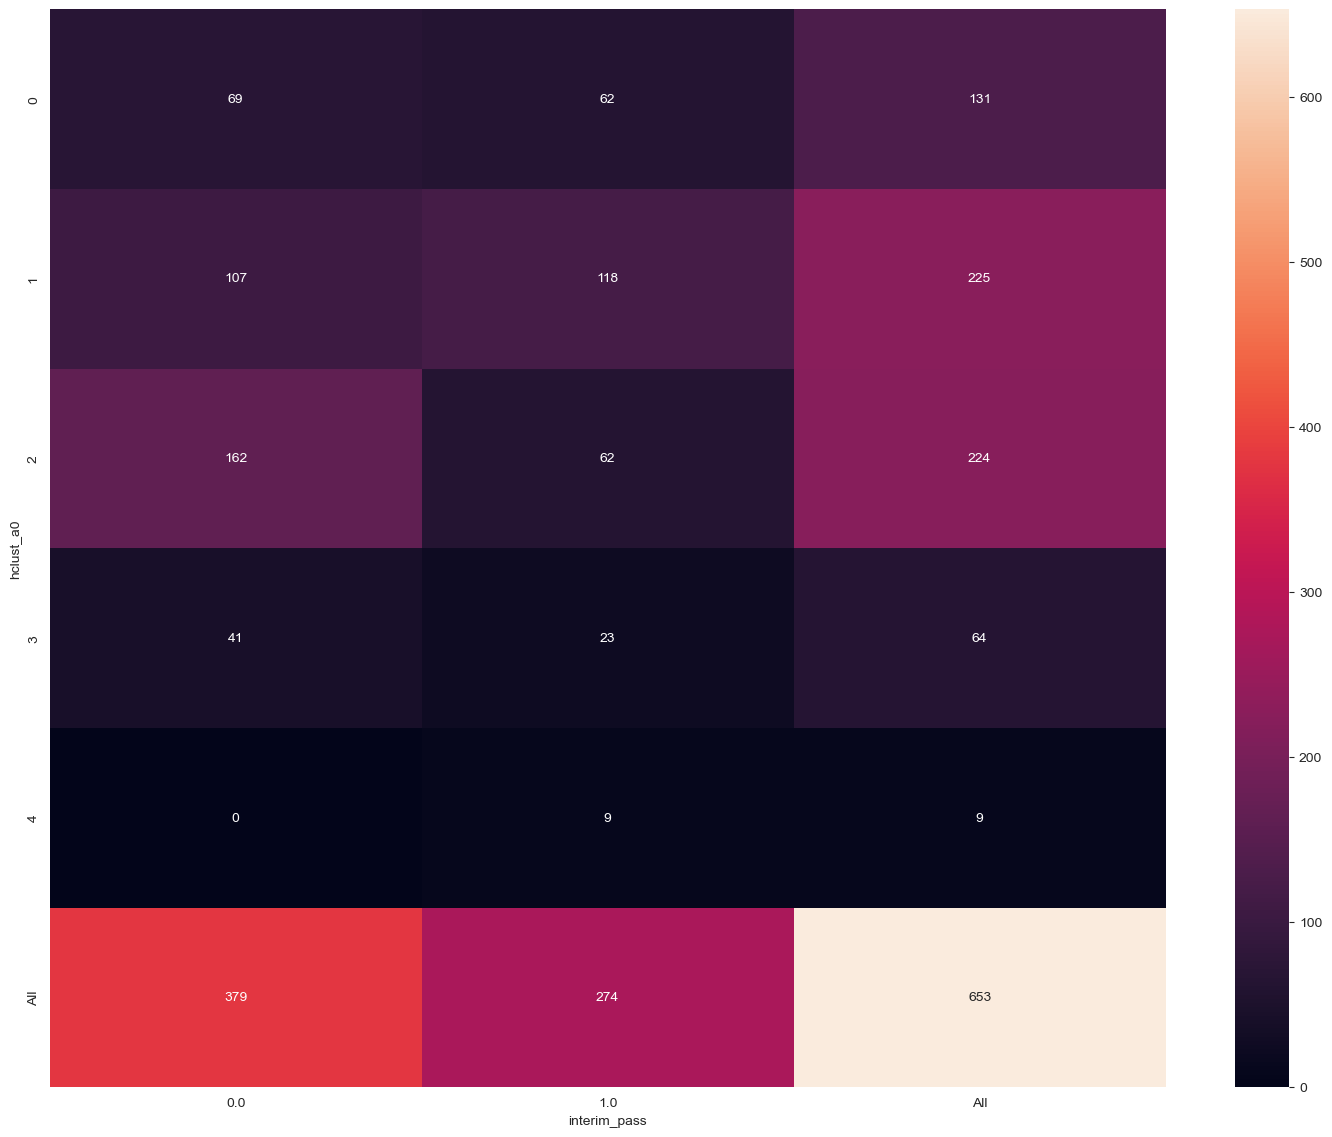

In [64]:
fig, ax = plt.subplots(figsize=(18,14))

sns.heatmap(pd.crosstab(pc_scores_outp_df.hclust_a0, pc_scores_outp_df.interim_pass, margins=True),
            annot=True, annot_kws={'size': 10}, fmt='g')

plt.show()

## Logistic Regression with PCs

In [65]:
pc_to_model_df = pd.concat([select_sess_df.loc[:,['sid','actv_grp','interim_pass']].copy(), pc_scores_select_df.copy()], axis=1)

In [66]:
pc_features = ['PC01','PC02','PC03','PC04','PC05','PC06','PC07','PC08','PC09','PC10','PC11','PC12']

In [67]:
pc_features_str = ''
for ix, x in enumerate(pc_features):
    if ix == len(pc_features) - 1:
        pc_features_str = pc_features_str + x
    else:
        pc_features_str = pc_features_str + x + ' + '
pc_features_str

'PC01 + PC02 + PC03 + PC04 + PC05 + PC06 + PC07 + PC08 + PC09 + PC10 + PC11 + PC12'

In [68]:
pc_desc_formulas = ['interim_pass ~ sid'
                        ,'interim_pass ~ sid + actv_grp'
                        ,'interim_pass ~ sid + actv_grp + ' + pc_features_str
                        ,'interim_pass ~ sid * (' + pc_features_str + ')'
                        ,'interim_pass ~ sid * (actv_grp + ' + pc_features_str + ')'
                       ]

In [69]:
pc_pred_formulas = ['interim_pass ~ ' + pc_features_str
                    ,'interim_pass ~ (' + pc_features_str + ')**2'
                    ,'interim_pass ~ actv_grp + ' + pc_features_str
                    ,'interim_pass ~ actv_grp * (' + pc_features_str + ')'
                    ,'interim_pass ~ actv_grp + (' + pc_features_str + ')**2'
                    ,'interim_pass ~ actv_grp * (' + pc_features_str + ')**2'
                   ]

In [70]:
formula_list = pc_desc_formulas + pc_pred_formulas

In [71]:
formula_list

['interim_pass ~ sid',
 'interim_pass ~ sid + actv_grp',
 'interim_pass ~ sid + actv_grp + PC01 + PC02 + PC03 + PC04 + PC05 + PC06 + PC07 + PC08 + PC09 + PC10 + PC11 + PC12',
 'interim_pass ~ sid * (PC01 + PC02 + PC03 + PC04 + PC05 + PC06 + PC07 + PC08 + PC09 + PC10 + PC11 + PC12)',
 'interim_pass ~ sid * (actv_grp + PC01 + PC02 + PC03 + PC04 + PC05 + PC06 + PC07 + PC08 + PC09 + PC10 + PC11 + PC12)',
 'interim_pass ~ PC01 + PC02 + PC03 + PC04 + PC05 + PC06 + PC07 + PC08 + PC09 + PC10 + PC11 + PC12',
 'interim_pass ~ (PC01 + PC02 + PC03 + PC04 + PC05 + PC06 + PC07 + PC08 + PC09 + PC10 + PC11 + PC12)**2',
 'interim_pass ~ actv_grp + PC01 + PC02 + PC03 + PC04 + PC05 + PC06 + PC07 + PC08 + PC09 + PC10 + PC11 + PC12',
 'interim_pass ~ actv_grp * (PC01 + PC02 + PC03 + PC04 + PC05 + PC06 + PC07 + PC08 + PC09 + PC10 + PC11 + PC12)',
 'interim_pass ~ actv_grp + (PC01 + PC02 + PC03 + PC04 + PC05 + PC06 + PC07 + PC08 + PC09 + PC10 + PC11 + PC12)**2',
 'interim_pass ~ actv_grp * (PC01 + PC02 + PC0

##### Evaluate number of features with dmatrices

In [72]:
sk_list = make_dmat(pc_to_model_df, formula_list)

In [73]:
model_dim = make_dim_df(pc_to_model_df, sk_list, formula_list)

In [74]:
model_dim

,model name,dimensions,number of obs,dim < obs
0,0,2,653,Yes
1,1,11,653,Yes
2,2,23,653,Yes
3,3,26,653,Yes
4,4,44,653,Yes
5,5,13,653,Yes
6,6,79,653,Yes
7,7,22,653,Yes
8,8,130,653,Yes
9,9,88,653,Yes


### Statsmodels

In [75]:
def fit_model(dm_y, dm_X):
    return sm.GLM(dm_y, dm_X, family=sm.families.Binomial()).fit(bic_llf=True)

In [76]:
pc_dm00_y, pc_dm00_X = dmatrices(formula_list[0], data=pc_to_model_df, return_type='dataframe')
pc_dm01_y, pc_dm01_X = dmatrices(formula_list[1], data=pc_to_model_df, return_type='dataframe')
pc_dm02_y, pc_dm02_X = dmatrices(formula_list[2], data=pc_to_model_df, return_type='dataframe')
pc_dm03_y, pc_dm03_X = dmatrices(formula_list[3], data=pc_to_model_df, return_type='dataframe')
pc_dm04_y, pc_dm04_X = dmatrices(formula_list[4], data=pc_to_model_df, return_type='dataframe')
pc_dm05_y, pc_dm05_X = dmatrices(formula_list[5], data=pc_to_model_df, return_type='dataframe')
pc_dm06_y, pc_dm06_X = dmatrices(formula_list[6], data=pc_to_model_df, return_type='dataframe')
pc_dm07_y, pc_dm07_X = dmatrices(formula_list[7], data=pc_to_model_df, return_type='dataframe')
pc_dm08_y, pc_dm08_X = dmatrices(formula_list[8], data=pc_to_model_df, return_type='dataframe')
pc_dm09_y, pc_dm09_X = dmatrices(formula_list[9], data=pc_to_model_df, return_type='dataframe')
pc_dm10_y, pc_dm10_X = dmatrices(formula_list[10], data=pc_to_model_df, return_type='dataframe')

In [77]:
model_list = []

In [78]:
model_list.append( fit_model(pc_dm00_y, pc_dm00_X) )

In [79]:
time.sleep(5)

In [80]:
model_list.append( fit_model(pc_dm01_y, pc_dm01_X) )

In [81]:
time.sleep(5)

In [82]:
model_list.append( fit_model(pc_dm02_y, pc_dm02_X) )

In [83]:
time.sleep(5)

In [84]:
model_list.append( fit_model(pc_dm03_y, pc_dm03_X) )

In [85]:
time.sleep(5)

In [86]:
model_list.append( fit_model(pc_dm04_y, pc_dm04_X) )

In [87]:
time.sleep(5)

In [88]:
model_list.append( fit_model(pc_dm05_y, pc_dm05_X) )

In [89]:
time.sleep(5)

In [90]:
model_list.append( fit_model(pc_dm06_y, pc_dm06_X) )

In [91]:
time.sleep(5)

In [92]:
model_list.append( fit_model(pc_dm07_y, pc_dm07_X) )

In [93]:
time.sleep(5)

In [94]:
model_list.append( fit_model(pc_dm08_y, pc_dm08_X) )

/Users/lisaover/opt/anaconda3/envs/cmpinf2120/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


In [95]:
time.sleep(5)

In [96]:
model_list.append( fit_model(pc_dm09_y, pc_dm09_X) )

Perfect separation detected, results not available

In [97]:
#time.sleep(5)

In [98]:
#model_list.append( fit_model(pc_dm10_y, pc_dm10_X) )

In [99]:
model_results = pd.DataFrame({'model_name': ['mod00','mod01','mod02','mod03','mod04','mod05','mod06','mod07','mod08','mod09'],
                              'AIC': [mod.aic for mod in model_list],
                              'BIC': [mod.bic for mod in model_list]})

/Users/lisaover/opt/anaconda3/envs/cmpinf2120/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/Users/lisaover/opt/anaconda3/envs/cmpinf2120/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1014: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/Users/lisaover/opt/anaconda3/envs/cmpinf2120/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with 

In [100]:
model_results

,model_name,AIC,BIC
0,mod00,892.291197,-3331.215514
1,mod01,906.704377,-3276.468140
2,mod02,835.870558,-3293.523034
3,mod03,703.443078,-3412.505782
4,mod04,725.814320,-3309.466151
5,mod05,824.374147,-3349.835215
6,mod06,601.061981,-3277.363291
7,mod07,834.218919,-3299.656250
8,mod08,NaN,19196.275128
9,mod09,579.486629,-3258.604449


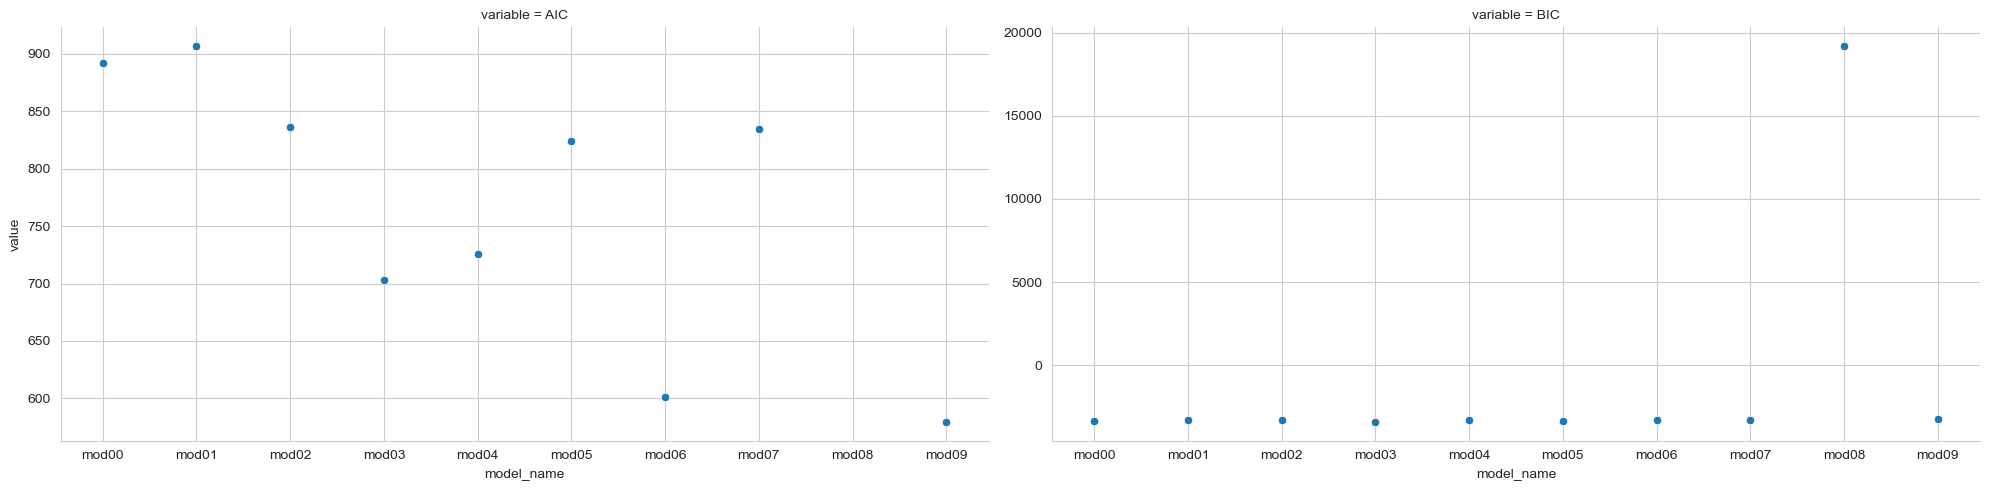

In [101]:
sns.relplot(data = model_results.melt(id_vars=['model_name']),
            x='model_name',
            y='value', 
            col='variable',
            col_wrap=2,
            facet_kws = {'sharey': False},
            height=5, aspect=2)

plt.show()

## ElasticNet Logistic Regression

#### Preprocess with Pipelines - include sid and actv_grp as categorical inputs

In [102]:
select_sess_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 652
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sess                 653 non-null    int64  
 1   sid                  653 non-null    int64  
 2   actv_grp             653 non-null    object 
 3   total_ms_tp000_sqrt  653 non-null    float64
 4   mw_tp000_sqrt        653 non-null    float64
 5   mwc_tp000_sqrt       653 non-null    float64
 6   mcl_tp000_sqrt       653 non-null    float64
 7   mcr_tp000_sqrt       653 non-null    float64
 8   mm_tp000_sqrt        653 non-null    float64
 9   ks_tp000_sqrt        653 non-null    float64
 10  total_ms_tp010_sqrt  653 non-null    float64
 11  mw_tp010_sqrt        653 non-null    float64
 12  mwc_tp010_sqrt       653 non-null    float64
 13  mcl_tp010_sqrt       653 non-null    float64
 14  mcr_tp010_sqrt       653 non-null    float64
 15  mm_tp010_sqrt        653 non-null    flo

In [103]:
categorical_inputs = ['sid','actv_grp']


In [104]:
sqrt_vars

['total_ms_tp000_sqrt',
 'mw_tp000_sqrt',
 'mwc_tp000_sqrt',
 'mcl_tp000_sqrt',
 'mcr_tp000_sqrt',
 'mm_tp000_sqrt',
 'ks_tp000_sqrt',
 'total_ms_tp010_sqrt',
 'mw_tp010_sqrt',
 'mwc_tp010_sqrt',
 'mcl_tp010_sqrt',
 'mcr_tp010_sqrt',
 'mm_tp010_sqrt',
 'ks_tp010_sqrt',
 'total_ms_tp020_sqrt',
 'mw_tp020_sqrt',
 'mwc_tp020_sqrt',
 'mcl_tp020_sqrt',
 'mcr_tp020_sqrt',
 'mm_tp020_sqrt',
 'ks_tp020_sqrt',
 'total_ms_tp030_sqrt',
 'mw_tp030_sqrt',
 'mwc_tp030_sqrt',
 'mcl_tp030_sqrt',
 'mcr_tp030_sqrt',
 'mm_tp030_sqrt',
 'ks_tp030_sqrt',
 'total_ms_tp040_sqrt',
 'mw_tp040_sqrt',
 'mwc_tp040_sqrt',
 'mcl_tp040_sqrt',
 'mcr_tp040_sqrt',
 'mm_tp040_sqrt',
 'ks_tp040_sqrt',
 'total_ms_tp050_sqrt',
 'mw_tp050_sqrt',
 'mwc_tp050_sqrt',
 'mcl_tp050_sqrt',
 'mcr_tp050_sqrt',
 'mm_tp050_sqrt',
 'ks_tp050_sqrt',
 'total_ms_tp060_sqrt',
 'mw_tp060_sqrt',
 'mwc_tp060_sqrt',
 'mcl_tp060_sqrt',
 'mcr_tp060_sqrt',
 'mm_tp060_sqrt',
 'ks_tp060_sqrt',
 'total_ms_tp070_sqrt',
 'mw_tp070_sqrt',
 'mwc_tp070_s

In [105]:
categorical_transform = Pipeline( steps = [ ('dummy', OneHotEncoder(drop='first')) ] )


In [106]:
numeric_transform_pca = Pipeline( steps=[('std_input', StandardScaler()),
                                        ('pca', PCA(n_components=num_pcs)),
                                        ('std_features', StandardScaler())])


In [107]:
complex_transform = ColumnTransformer( transformers=[('num', numeric_transform_pca, sqrt_vars),
                                                    ('cat', categorical_transform, categorical_inputs)])

In [108]:
complex_transform.transformers


[('num',
  Pipeline(steps=[('std_input', StandardScaler()), ('pca', PCA(n_components=12)),
                  ('std_features', StandardScaler())]),
  ['total_ms_tp000_sqrt',
   'mw_tp000_sqrt',
   'mwc_tp000_sqrt',
   'mcl_tp000_sqrt',
   'mcr_tp000_sqrt',
   'mm_tp000_sqrt',
   'ks_tp000_sqrt',
   'total_ms_tp010_sqrt',
   'mw_tp010_sqrt',
   'mwc_tp010_sqrt',
   'mcl_tp010_sqrt',
   'mcr_tp010_sqrt',
   'mm_tp010_sqrt',
   'ks_tp010_sqrt',
   'total_ms_tp020_sqrt',
   'mw_tp020_sqrt',
   'mwc_tp020_sqrt',
   'mcl_tp020_sqrt',
   'mcr_tp020_sqrt',
   'mm_tp020_sqrt',
   'ks_tp020_sqrt',
   'total_ms_tp030_sqrt',
   'mw_tp030_sqrt',
   'mwc_tp030_sqrt',
   'mcl_tp030_sqrt',
   'mcr_tp030_sqrt',
   'mm_tp030_sqrt',
   'ks_tp030_sqrt',
   'total_ms_tp040_sqrt',
   'mw_tp040_sqrt',
   'mwc_tp040_sqrt',
   'mcl_tp040_sqrt',
   'mcr_tp040_sqrt',
   'mm_tp040_sqrt',
   'ks_tp040_sqrt',
   'total_ms_tp050_sqrt',
   'mw_tp050_sqrt',
   'mwc_tp050_sqrt',
   'mcl_tp050_sqrt',
   'mcr_tp050_sqrt',

In [109]:
additive_transform = Pipeline( steps=[ ('prepro', complex_transform),
                                          ('make_poly', PolynomialFeatures(degree=1, interaction_only=True, include_bias=False))])

In [110]:
additive_transform.fit_transform(select_sess_df).shape

(653, 101)

In [111]:
len(sqrt_vars)

77

In [112]:
select_sess_df.shape

(653, 81)

In [113]:
select_sess_X = select_sess_df.drop(columns=['sess','interim_pass']).copy()

In [114]:
select_sess_df.interim_pass.value_counts()

0.0    379
1.0    274
Name: interim_pass, dtype: int64

In [115]:
select_sess_df.interim_pass.to_numpy().ravel()

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [116]:
select_sess_y = select_sess_df.interim_pass.to_numpy().ravel()

In [117]:
select_sess_X.shape

(653, 79)

In [118]:
select_sess_X.columns

Index(['sid', 'actv_grp', 'total_ms_tp000_sqrt', 'mw_tp000_sqrt',
       'mwc_tp000_sqrt', 'mcl_tp000_sqrt', 'mcr_tp000_sqrt', 'mm_tp000_sqrt',
       'ks_tp000_sqrt', 'total_ms_tp010_sqrt', 'mw_tp010_sqrt',
       'mwc_tp010_sqrt', 'mcl_tp010_sqrt', 'mcr_tp010_sqrt', 'mm_tp010_sqrt',
       'ks_tp010_sqrt', 'total_ms_tp020_sqrt', 'mw_tp020_sqrt',
       'mwc_tp020_sqrt', 'mcl_tp020_sqrt', 'mcr_tp020_sqrt', 'mm_tp020_sqrt',
       'ks_tp020_sqrt', 'total_ms_tp030_sqrt', 'mw_tp030_sqrt',
       'mwc_tp030_sqrt', 'mcl_tp030_sqrt', 'mcr_tp030_sqrt', 'mm_tp030_sqrt',
       'ks_tp030_sqrt', 'total_ms_tp040_sqrt', 'mw_tp040_sqrt',
       'mwc_tp040_sqrt', 'mcl_tp040_sqrt', 'mcr_tp040_sqrt', 'mm_tp040_sqrt',
       'ks_tp040_sqrt', 'total_ms_tp050_sqrt', 'mw_tp050_sqrt',
       'mwc_tp050_sqrt', 'mcl_tp050_sqrt', 'mcr_tp050_sqrt', 'mm_tp050_sqrt',
       'ks_tp050_sqrt', 'total_ms_tp060_sqrt', 'mw_tp060_sqrt',
       'mwc_tp060_sqrt', 'mcl_tp060_sqrt', 'mcr_tp060_sqrt', 'mm_tp060_sqrt',
    

In [119]:
additive_transform.fit_transform( select_sess_X ).shape

(653, 101)

#### Fit model with Elastic Net and Pipelines

In [120]:
enet_to_fit = LogisticRegression(penalty='elasticnet', solver='saga', random_state=101, max_iter=25001, fit_intercept=True)

In [121]:
enet_grid = {'enet__C': np.exp(np.linspace(-6, 6, num=11)),
            'enet__l1_ratio': np.linspace(0, 1, num=5)}

In [122]:
enet_additv_wflow = Pipeline( steps = [('prepro', additive_transform),
                                      ('enet', enet_to_fit)] )

In [123]:
my_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

In [124]:
enet_additv_search = GridSearchCV( enet_additv_wflow, enet_grid, cv=my_cv)

In [125]:
enet_additv_search_results = enet_additv_search.fit(select_sess_X, select_sess_y)

In [126]:
enet_additv_search_results.best_params_

{'enet__C': 11.023176380641605, 'enet__l1_ratio': 0.25}

In [127]:
enet_additv_search_results.best_score_

1.0

In [128]:
enet_additv_search_results.best_estimator_.named_steps['enet'].coef_

array([[ 0.61089989,  0.27795982, -0.27477078,  0.14874456, -0.05045775,
         0.3075289 , -0.97728891, -0.03718187,  0.46868514, -0.55774552,
        -0.07856481,  0.022888  , -2.14181277, -3.07544824,  3.50124427,
         3.35332434,  2.94305334, -3.71774753, -4.02770421,  2.6286713 ,
        -3.82218762, -2.50552547,  4.56432194, -2.62347526, -1.7204614 ,
        -2.66375703,  4.13638292, -5.50537852, -2.60009931,  5.12798023,
         3.79322198, -3.15234746, -0.23141051,  3.97598264, -2.70267572,
        -1.94269991,  2.91263303,  3.47503434,  3.82939812, -3.18796847,
        -3.48101538,  2.03459272, -2.83272708,  4.15629066,  2.81900803,
        -1.40444991, -3.01310385, -1.97693414, -4.32733173, -2.86949148,
        -2.78469938,  3.72336412, -4.30561345,  3.34724042, -2.6039315 ,
        -2.75383315, -3.46023178, -2.35976632, -3.86316577,  2.38468335,
         5.20182576,  2.68177259,  3.05547232,  2.36962028, -3.93666854,
        -2.83699619, -2.50102357,  3.89856457, -0.9

In [129]:
enet_additv_search_results.best_estimator_.named_steps['enet'].coef_.shape

(1, 101)

In [130]:
enet_additv_search_results.best_estimator_.named_steps['enet'].coef_.tolist()[0][85]

-2.4826485016623177

In [131]:
enet_additv_search_results.best_estimator_.named_steps['enet'].coef_[enet_additv_search_results.best_estimator_.named_steps['enet'].coef_ != 0].size

101

In [132]:
select_sess_df.shape

(653, 81)

In [133]:
select_sess_df.columns

Index(['sess', 'sid', 'actv_grp', 'total_ms_tp000_sqrt', 'mw_tp000_sqrt',
       'mwc_tp000_sqrt', 'mcl_tp000_sqrt', 'mcr_tp000_sqrt', 'mm_tp000_sqrt',
       'ks_tp000_sqrt', 'total_ms_tp010_sqrt', 'mw_tp010_sqrt',
       'mwc_tp010_sqrt', 'mcl_tp010_sqrt', 'mcr_tp010_sqrt', 'mm_tp010_sqrt',
       'ks_tp010_sqrt', 'total_ms_tp020_sqrt', 'mw_tp020_sqrt',
       'mwc_tp020_sqrt', 'mcl_tp020_sqrt', 'mcr_tp020_sqrt', 'mm_tp020_sqrt',
       'ks_tp020_sqrt', 'total_ms_tp030_sqrt', 'mw_tp030_sqrt',
       'mwc_tp030_sqrt', 'mcl_tp030_sqrt', 'mcr_tp030_sqrt', 'mm_tp030_sqrt',
       'ks_tp030_sqrt', 'total_ms_tp040_sqrt', 'mw_tp040_sqrt',
       'mwc_tp040_sqrt', 'mcl_tp040_sqrt', 'mcr_tp040_sqrt', 'mm_tp040_sqrt',
       'ks_tp040_sqrt', 'total_ms_tp050_sqrt', 'mw_tp050_sqrt',
       'mwc_tp050_sqrt', 'mcl_tp050_sqrt', 'mcr_tp050_sqrt', 'mm_tp050_sqrt',
       'ks_tp050_sqrt', 'total_ms_tp060_sqrt', 'mw_tp060_sqrt',
       'mwc_tp060_sqrt', 'mcl_tp060_sqrt', 'mcr_tp060_sqrt', 'mm_tp060_sqr

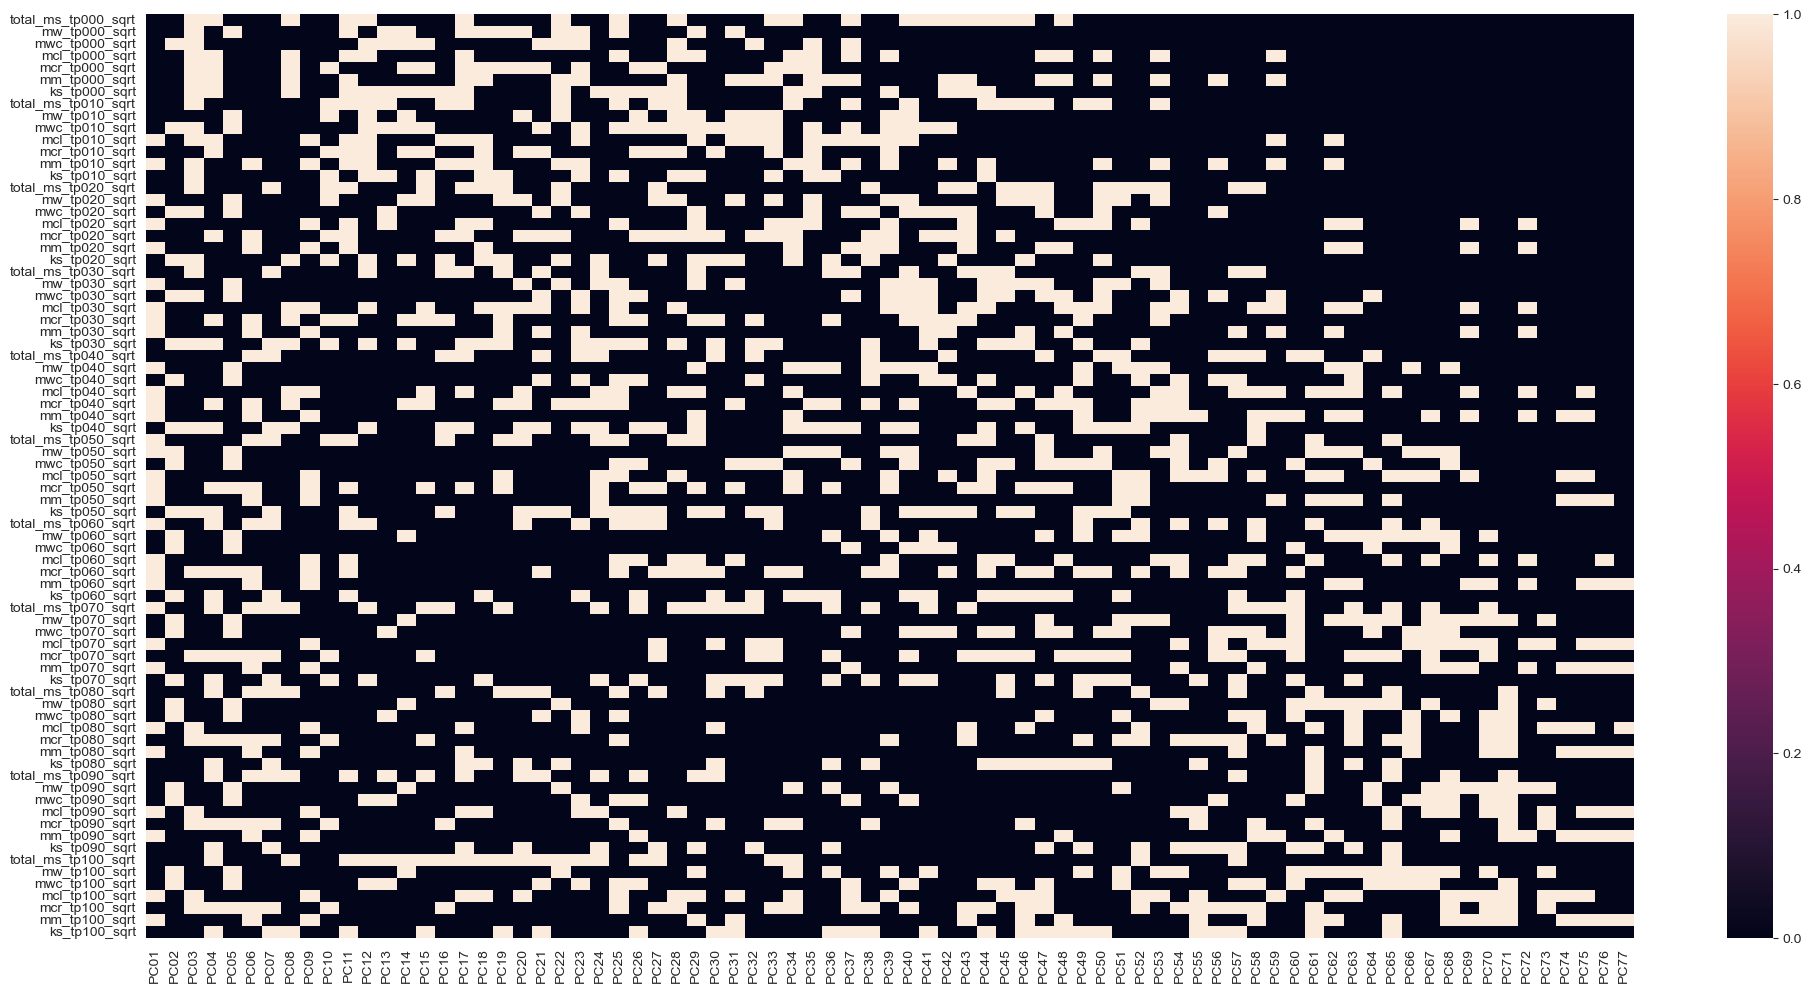

In [134]:
fig, ax = plt.subplots(figsize=(24, 12))

sns.heatmap( data = np.transpose( calc_pca_contrib( pca_object.components_) ) > (1 / timepoint_pcs.shape[1]), 
            xticklabels=pc_scores_df.iloc[:, :len(feature_names)].columns.tolist(),
            yticklabels=feature_names,
            vmin=0, vmax=1)

plt.savefig('s2_pc_contrib.png')
plt.show()

In [135]:
select_sess_df.sid.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,  10,  11,  12,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  24,  27,  28,  29,  30,  32,
        34,  36,  38,  39,  41,  42,  43,  44,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  56,  59,  61,  63,  66,  67,  70,  71,  72,
        73,  74,  76,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104])

In [136]:
select_sess_df.actv_grp.unique()

array(['Aulaweb', 'Blank', 'Deeds', 'Diagram', 'Other', 'Properties',
       'Study', 'TextEditor', 'FSM_Related', 'Study_Materials'],
      dtype=object)

In [137]:
input_grid = pd.DataFrame([ (xs,xag,xa0,xb0,xc0,xd0,xe0,xf0,xg0,xa1,xb1,xc1,xd1,xe1,xf1,xg1,xa2,xb2,xc2,xd2,xe2,xf2,xg2,xa3,xb3,xc3,xd3,xe3,xf3,xg3,xa4,xb4,xc4,xd4,xe4,xf4,xg4,xa5,xb5,xc5,xd5,xe5,xf5,xg5,xa6,xb6,xc6,xd6,xe6,xf6,xg6,xa7,xb7,xc7,xd7,xe7,xf7,xg7,xa8,xb8,xc8,xd8,xe8,xf8,xg8,xa9,xb9,xc9,xd9,xe9,xf9,xg9,xa10,xb10,xc10,xd10,xe10,xf10,xg10) 
                          for xs in [5,20,41,56,79,93]
                          for xag in ['Aulaweb', 'Deeds', 'Diagram','TextEditor']
                          for xa0 in [select_sess_df.total_ms_tp000_sqrt.median()]
                          for xb0 in [select_sess_df.mw_tp000_sqrt.median()]
                          for xc0 in [select_sess_df.mwc_tp000_sqrt.median()]
                          for xd0 in [select_sess_df.mcl_tp000_sqrt.median()]
                          for xe0 in [select_sess_df.mcr_tp000_sqrt.median()]
                          for xf0 in [select_sess_df.mm_tp000_sqrt.median()]
                          for xg0 in [select_sess_df.ks_tp000_sqrt.median()]
                          for xa1 in [select_sess_df.total_ms_tp010_sqrt.median()]
                          for xb1 in [select_sess_df.mw_tp010_sqrt.median()]
                          for xc1 in [select_sess_df.mwc_tp010_sqrt.median()]
                          for xd1 in [select_sess_df.mcl_tp010_sqrt.median()]
                          for xe1 in [select_sess_df.mcr_tp010_sqrt.median()]
                          for xf1 in [select_sess_df.mm_tp010_sqrt.median()]
                          for xg1 in [select_sess_df.ks_tp010_sqrt.median()]
                          for xa2 in [select_sess_df.total_ms_tp020_sqrt.median()]
                          for xb2 in [select_sess_df.mw_tp020_sqrt.median()]
                          for xc2 in [select_sess_df.mwc_tp020_sqrt.median()]
                          for xd2 in [select_sess_df.mcl_tp020_sqrt.median()]
                          for xe2 in [select_sess_df.mcr_tp020_sqrt.median()]
                          for xf2 in [select_sess_df.mm_tp020_sqrt.median()]
                          for xg2 in [select_sess_df.ks_tp020_sqrt.median()]
                          for xa3 in [select_sess_df.total_ms_tp030_sqrt.median()]
                          for xb3 in [select_sess_df.mw_tp030_sqrt.median()]
                          for xc3 in [select_sess_df.mwc_tp030_sqrt.median()]
                          for xd3 in [select_sess_df.mcl_tp030_sqrt.median()]
                          for xe3 in [select_sess_df.mcr_tp030_sqrt.median()]
                          for xf3 in [select_sess_df.mm_tp030_sqrt.median()]
                          for xg3 in [select_sess_df.ks_tp030_sqrt.median()]
                          for xa4 in [select_sess_df.total_ms_tp040_sqrt.median()]
                          for xb4 in [select_sess_df.mw_tp040_sqrt.median()]
                          for xc4 in [select_sess_df.mwc_tp040_sqrt.median()]
                          for xd4 in [select_sess_df.mcl_tp040_sqrt.median()]
                          for xe4 in [select_sess_df.mcr_tp040_sqrt.median()]
                          for xf4 in [select_sess_df.mm_tp040_sqrt.median()]
                          for xg4 in [select_sess_df.ks_tp040_sqrt.median()]
                          for xa5 in [select_sess_df.total_ms_tp050_sqrt.median()]
                          for xb5 in [select_sess_df.mw_tp050_sqrt.median()]
                          for xc5 in [select_sess_df.mwc_tp050_sqrt.median()]
                          for xd5 in [select_sess_df.mcl_tp050_sqrt.median()]
                          for xe5 in [select_sess_df.mcr_tp050_sqrt.median()]
                          for xf5 in [select_sess_df.mm_tp050_sqrt.median()]
                          for xg5 in [select_sess_df.ks_tp050_sqrt.median()]
                          for xa6 in [select_sess_df.total_ms_tp060_sqrt.median()]
                          for xb6 in [select_sess_df.mw_tp060_sqrt.median()]
                          for xc6 in [select_sess_df.mwc_tp060_sqrt.median()]
                          for xd6 in [select_sess_df.mcl_tp060_sqrt.median()]
                          for xe6 in [select_sess_df.mcr_tp060_sqrt.median()]
                          for xf6 in [select_sess_df.mm_tp060_sqrt.median()]
                          for xg6 in [select_sess_df.ks_tp060_sqrt.median()]
                          for xa7 in [select_sess_df.total_ms_tp070_sqrt.median()]
                          for xb7 in [select_sess_df.mw_tp070_sqrt.median()]
                          for xc7 in [select_sess_df.mwc_tp070_sqrt.median()]
                          for xd7 in [select_sess_df.mcl_tp070_sqrt.median()]
                          for xe7 in [select_sess_df.mcr_tp070_sqrt.median()]
                          for xf7 in [select_sess_df.mm_tp070_sqrt.median()]
                          for xg7 in [select_sess_df.ks_tp070_sqrt.median()]
                          for xa8 in [select_sess_df.total_ms_tp080_sqrt.median()]
                          for xb8 in [select_sess_df.mw_tp080_sqrt.median()]
                          for xc8 in [select_sess_df.mwc_tp080_sqrt.median()]
                          for xd8 in [select_sess_df.mcl_tp080_sqrt.median()]
                          for xe8 in [select_sess_df.mcr_tp080_sqrt.median()]
                          for xf8 in [select_sess_df.mm_tp080_sqrt.median()]
                          for xg8 in [select_sess_df.ks_tp080_sqrt.median()]
                          for xa9 in [select_sess_df.total_ms_tp090_sqrt.median()]
                          for xb9 in [select_sess_df.mw_tp090_sqrt.median()]
                          for xc9 in [select_sess_df.mwc_tp090_sqrt.median()]
                          for xd9 in [select_sess_df.mcl_tp090_sqrt.median()]
                          for xe9 in [select_sess_df.mcr_tp090_sqrt.median()]
                          for xf9 in [select_sess_df.mm_tp090_sqrt.median()]
                          for xg9 in [select_sess_df.ks_tp090_sqrt.median()]
                          for xa10 in [select_sess_df.total_ms_tp100_sqrt.median()]
                          for xb10 in [select_sess_df.mw_tp100_sqrt.median()]
                          for xc10 in [select_sess_df.mwc_tp100_sqrt.median()]
                          for xd10 in [select_sess_df.mcl_tp100_sqrt.median()]
                          for xe10 in [select_sess_df.mcr_tp100_sqrt.median()]
                          for xf10 in np.linspace(select_sess_df.mm_tp100_sqrt.min() - 0.02, select_sess_df.mm_tp100_sqrt.max() + 0.02, num=101)
                          for xg10 in [select_sess_df.ks_tp100_sqrt.median()]], 
                         columns=['sid', 'actv_grp', 'total_ms_tp000_sqrt', 'mw_tp000_sqrt',
       'mwc_tp000_sqrt', 'mcl_tp000_sqrt', 'mcr_tp000_sqrt', 'mm_tp000_sqrt',
       'ks_tp000_sqrt', 'total_ms_tp010_sqrt', 'mw_tp010_sqrt',
       'mwc_tp010_sqrt', 'mcl_tp010_sqrt', 'mcr_tp010_sqrt', 'mm_tp010_sqrt',
       'ks_tp010_sqrt', 'total_ms_tp020_sqrt', 'mw_tp020_sqrt',
       'mwc_tp020_sqrt', 'mcl_tp020_sqrt', 'mcr_tp020_sqrt', 'mm_tp020_sqrt',
       'ks_tp020_sqrt', 'total_ms_tp030_sqrt', 'mw_tp030_sqrt',
       'mwc_tp030_sqrt', 'mcl_tp030_sqrt', 'mcr_tp030_sqrt', 'mm_tp030_sqrt',
       'ks_tp030_sqrt', 'total_ms_tp040_sqrt', 'mw_tp040_sqrt',
       'mwc_tp040_sqrt', 'mcl_tp040_sqrt', 'mcr_tp040_sqrt', 'mm_tp040_sqrt',
       'ks_tp040_sqrt', 'total_ms_tp050_sqrt', 'mw_tp050_sqrt',
       'mwc_tp050_sqrt', 'mcl_tp050_sqrt', 'mcr_tp050_sqrt', 'mm_tp050_sqrt',
       'ks_tp050_sqrt', 'total_ms_tp060_sqrt', 'mw_tp060_sqrt',
       'mwc_tp060_sqrt', 'mcl_tp060_sqrt', 'mcr_tp060_sqrt', 'mm_tp060_sqrt',
       'ks_tp060_sqrt', 'total_ms_tp070_sqrt', 'mw_tp070_sqrt',
       'mwc_tp070_sqrt', 'mcl_tp070_sqrt', 'mcr_tp070_sqrt', 'mm_tp070_sqrt',
       'ks_tp070_sqrt', 'total_ms_tp080_sqrt', 'mw_tp080_sqrt',
       'mwc_tp080_sqrt', 'mcl_tp080_sqrt', 'mcr_tp080_sqrt', 'mm_tp080_sqrt',
       'ks_tp080_sqrt', 'total_ms_tp090_sqrt', 'mw_tp090_sqrt',
       'mwc_tp090_sqrt', 'mcl_tp090_sqrt', 'mcr_tp090_sqrt', 'mm_tp090_sqrt',
       'ks_tp090_sqrt', 'total_ms_tp100_sqrt', 'mw_tp100_sqrt',
       'mwc_tp100_sqrt', 'mcl_tp100_sqrt', 'mcr_tp100_sqrt', 'mm_tp100_sqrt',
       'ks_tp100_sqrt'])

In [138]:
input_grid.shape

(2424, 79)

In [139]:
input_grid.head()

,sid,actv_grp,total_ms_tp000_sqrt,mw_tp000_sqrt,mwc_tp000_sqrt,mcl_tp000_sqrt,mcr_tp000_sqrt,mm_tp000_sqrt,ks_tp000_sqrt,total_ms_tp010_sqrt,...,mcr_tp090_sqrt,mm_tp090_sqrt,ks_tp090_sqrt,total_ms_tp100_sqrt,mw_tp100_sqrt,mwc_tp100_sqrt,mcl_tp100_sqrt,mcr_tp100_sqrt,mm_tp100_sqrt,ks_tp100_sqrt
0,5,Aulaweb,252.982213,0.0,0.0,5.09902,0.0,43.081318,0.0,850.646813,...,13.928388,368.785032,58.379791,2866.007676,30.88689,0.0,55.497748,15.297059,7.121428,61.237244
1,5,Aulaweb,252.982213,0.0,0.0,5.09902,0.0,43.081318,0.0,850.646813,...,13.928388,368.785032,58.379791,2866.007676,30.88689,0.0,55.497748,15.297059,16.823551,61.237244
2,5,Aulaweb,252.982213,0.0,0.0,5.09902,0.0,43.081318,0.0,850.646813,...,13.928388,368.785032,58.379791,2866.007676,30.88689,0.0,55.497748,15.297059,26.525673,61.237244
3,5,Aulaweb,252.982213,0.0,0.0,5.09902,0.0,43.081318,0.0,850.646813,...,13.928388,368.785032,58.379791,2866.007676,30.88689,0.0,55.497748,15.297059,36.227796,61.237244
4,5,Aulaweb,252.982213,0.0,0.0,5.09902,0.0,43.081318,0.0,850.646813,...,13.928388,368.785032,58.379791,2866.007676,30.88689,0.0,55.497748,15.297059,45.929918,61.237244


In [140]:
select_sess_X.head()

,sid,actv_grp,total_ms_tp000_sqrt,mw_tp000_sqrt,mwc_tp000_sqrt,mcl_tp000_sqrt,mcr_tp000_sqrt,mm_tp000_sqrt,ks_tp000_sqrt,total_ms_tp010_sqrt,...,mcr_tp090_sqrt,mm_tp090_sqrt,ks_tp090_sqrt,total_ms_tp100_sqrt,mw_tp100_sqrt,mwc_tp100_sqrt,mcl_tp100_sqrt,mcr_tp100_sqrt,mm_tp100_sqrt,ks_tp100_sqrt
0,1,Aulaweb,1236.122971,16.643317,0.0,25.278449,1.414214,224.784341,37.496667,1552.288633,...,15.349267,486.501593,51.314715,2760.796986,37.775654,0.0,61.212744,16.309506,520.037499,54.387499
1,1,Blank,216.794834,2.645751,0.0,4.582576,0.000000,46.808119,2.828427,1177.794549,...,15.192103,494.317509,52.801515,2930.699575,38.483763,0.0,65.069194,17.720045,550.932845,57.113921
2,1,Deeds,70.710678,0.000000,0.0,2.449490,0.000000,21.260292,0.000000,1052.710786,...,15.297059,501.163047,54.166410,2928.310093,38.470768,0.0,64.992307,17.720045,550.207234,56.920998
3,1,Diagram,604.979338,4.472136,0.0,14.832397,0.000000,117.085439,14.352700,1408.474352,...,16.601205,525.389950,54.896266,2927.968579,38.470768,0.0,64.946132,17.720045,549.960908,56.920998
4,1,Other,771.362431,4.472136,0.0,16.852300,0.000000,151.650915,14.352700,1208.759695,...,16.309506,521.050669,54.721111,2933.087111,38.483763,0.0,65.306967,17.720045,552.080610,57.410800


In [141]:
input_grid_copy = input_grid.copy()

In [142]:
input_grid_copy['pred_enet_additv_class'] = enet_additv_search_results.predict( input_grid )

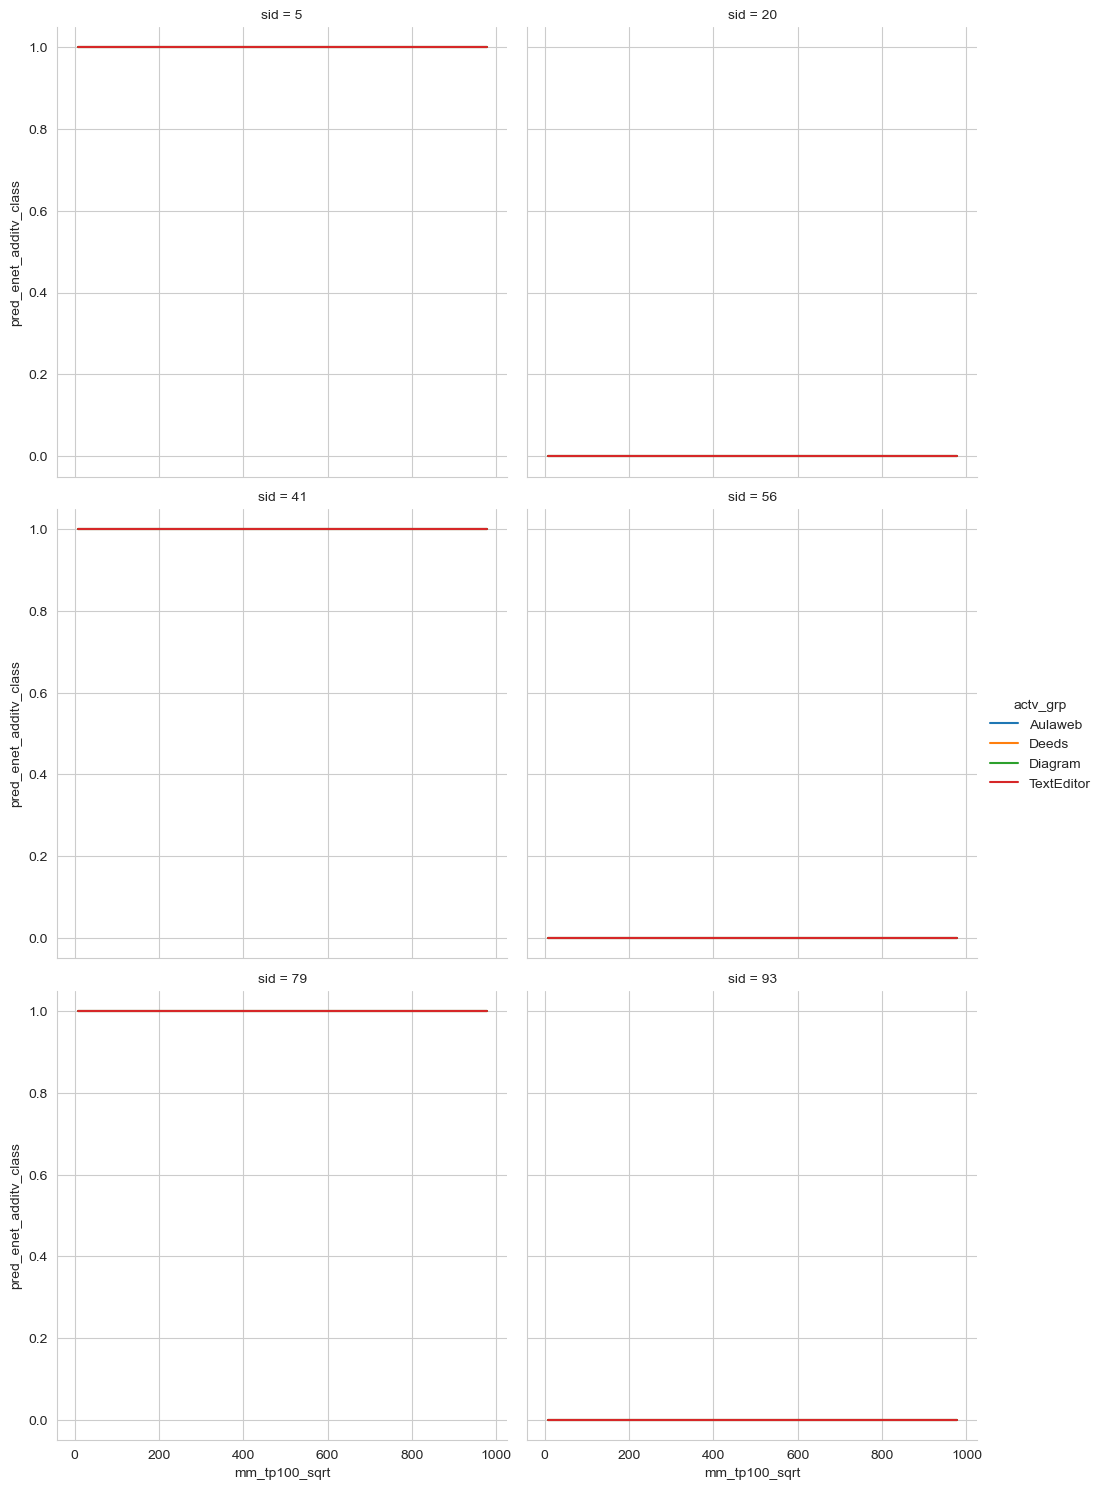

In [143]:
sns.relplot(data = input_grid_copy, x='mm_tp100_sqrt', y='pred_enet_additv_class', hue='actv_grp', 
            col='sid', col_wrap=2, kind='line')

plt.show()

#### Preprocess with Pipelines - include only actv_grp as categorical input

In [144]:
categorical_inputs_b = ['actv_grp']

In [145]:
categorical_transform_b = Pipeline( steps = [ ('dummy', OneHotEncoder(drop='first')) ] )

Use `numeric_transform_pca` from above

In [146]:
complex_transform_b = ColumnTransformer( transformers=[('num', numeric_transform_pca, sqrt_vars),
                                                    ('cat', categorical_transform_b, categorical_inputs_b)])

In [147]:
complex_transform_b.transformers

[('num',
  Pipeline(steps=[('std_input', StandardScaler()), ('pca', PCA(n_components=12)),
                  ('std_features', StandardScaler())]),
  ['total_ms_tp000_sqrt',
   'mw_tp000_sqrt',
   'mwc_tp000_sqrt',
   'mcl_tp000_sqrt',
   'mcr_tp000_sqrt',
   'mm_tp000_sqrt',
   'ks_tp000_sqrt',
   'total_ms_tp010_sqrt',
   'mw_tp010_sqrt',
   'mwc_tp010_sqrt',
   'mcl_tp010_sqrt',
   'mcr_tp010_sqrt',
   'mm_tp010_sqrt',
   'ks_tp010_sqrt',
   'total_ms_tp020_sqrt',
   'mw_tp020_sqrt',
   'mwc_tp020_sqrt',
   'mcl_tp020_sqrt',
   'mcr_tp020_sqrt',
   'mm_tp020_sqrt',
   'ks_tp020_sqrt',
   'total_ms_tp030_sqrt',
   'mw_tp030_sqrt',
   'mwc_tp030_sqrt',
   'mcl_tp030_sqrt',
   'mcr_tp030_sqrt',
   'mm_tp030_sqrt',
   'ks_tp030_sqrt',
   'total_ms_tp040_sqrt',
   'mw_tp040_sqrt',
   'mwc_tp040_sqrt',
   'mcl_tp040_sqrt',
   'mcr_tp040_sqrt',
   'mm_tp040_sqrt',
   'ks_tp040_sqrt',
   'total_ms_tp050_sqrt',
   'mw_tp050_sqrt',
   'mwc_tp050_sqrt',
   'mcl_tp050_sqrt',
   'mcr_tp050_sqrt',

In [148]:
interact_transform = Pipeline( steps=[ ('prepro', complex_transform_b),
                                          ('make_poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False))])


In [149]:
interact_transform.fit_transform(select_sess_df).shape

(653, 231)

In [150]:
select_sess_X_b = select_sess_df.drop(columns=['sess','sid','interim_pass']).copy()

In [151]:
select_sess_X.shape

(653, 79)

In [152]:
select_sess_X_b.shape

(653, 78)

In [153]:
select_sess_X_b.actv_grp.unique()

array(['Aulaweb', 'Blank', 'Deeds', 'Diagram', 'Other', 'Properties',
       'Study', 'TextEditor', 'FSM_Related', 'Study_Materials'],
      dtype=object)

In [154]:
len(select_sess_X_b.actv_grp.unique())

10

In [155]:
select_sess_df.interim_pass.value_counts()

0.0    379
1.0    274
Name: interim_pass, dtype: int64

Use same `select_sess_y` as above

In [156]:
interact_transform.fit_transform( select_sess_X_b ).shape

(653, 231)

#### Fit model with Elastic Net and Pipelines

Use `enet_to_fit`, `enet_grid`, and `my_cv` from above

In [157]:
enet_interact_wflow = Pipeline( steps = [('prepro', interact_transform),
                                      ('enet', enet_to_fit)] )

In [158]:
enet_interact_search = GridSearchCV( enet_interact_wflow, enet_grid, cv=my_cv)

In [159]:
enet_interact_search_results = enet_interact_search.fit(select_sess_X_b, select_sess_y)

In [160]:
enet_interact_search_results.best_params_

{'enet__C': 0.301194211912202, 'enet__l1_ratio': 1.0}

In [161]:
enet_interact_search_results.best_score_

0.7794128009395185

In [162]:
enet_interact_search_results.best_estimator_.named_steps['enet'].coef_

array([[ 0.        ,  0.        , -0.69361576,  0.5683175 ,  0.        ,
         0.        , -1.16178095,  0.        ,  0.2011758 , -0.35614139,
         0.        ,  0.        ,  0.        , -0.14966677,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.0442238 ,  0.        , -0.19493677,  0.13637333,
         0.80075277,  0.        ,  0.13073142, -0.72424148,  0.00156989,
        -0.22468978, -0.26951958,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.4038471 , -0.2057219 , -0.02016262,  0.0629105 ,
         0.02587327, -0.16104088,  0.        , -0.17740373,  0.        ,
        -0.05988025,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.23858038, -0.13483961, -0.41894843,  0.22166462, -0.42305627,
         0.29877283,  0.13265667,  0.07353326, -0.0

In [163]:
enet_interact_search_results.best_estimator_.named_steps['enet'].coef_.shape

(1, 231)

In [164]:
enet_interact_search_results.best_estimator_.named_steps['enet'].coef_[enet_interact_search_results.best_estimator_.named_steps['enet'].coef_ != 0].size

70

In [165]:
input_grid_b = pd.DataFrame([ (xag,xa0,xb0,xc0,xd0,xe0,xf0,xg0,xa1,xb1,xc1,xd1,xe1,xf1,xg1,xa2,xb2,xc2,xd2,xe2,xf2,xg2,xa3,xb3,xc3,xd3,xe3,xf3,xg3,xa4,xb4,xc4,xd4,xe4,xf4,xg4,xa5,xb5,xc5,xd5,xe5,xf5,xg5,xa6,xb6,xc6,xd6,xe6,xf6,xg6,xa7,xb7,xc7,xd7,xe7,xf7,xg7,xa8,xb8,xc8,xd8,xe8,xf8,xg8,xa9,xb9,xc9,xd9,xe9,xf9,xg9,xa10,xb10,xc10,xd10,xe10,xf10,xg10) 
                          for xag in select_sess_df.actv_grp.unique()
                          for xa0 in [select_sess_df.total_ms_tp000_sqrt.median()]
                          for xb0 in [select_sess_df.mw_tp000_sqrt.median()]
                          for xc0 in [select_sess_df.mwc_tp000_sqrt.median()]
                          for xd0 in [select_sess_df.mcl_tp000_sqrt.median()]
                          for xe0 in [select_sess_df.mcr_tp000_sqrt.median()]
                          for xf0 in [select_sess_df.mm_tp000_sqrt.median()]
                          for xg0 in [select_sess_df.ks_tp000_sqrt.median()]
                          for xa1 in [select_sess_df.total_ms_tp010_sqrt.median()]
                          for xb1 in [select_sess_df.mw_tp010_sqrt.median()]
                          for xc1 in [select_sess_df.mwc_tp010_sqrt.median()]
                          for xd1 in [select_sess_df.mcl_tp010_sqrt.median()]
                          for xe1 in [select_sess_df.mcr_tp010_sqrt.median()]
                          for xf1 in [select_sess_df.mm_tp010_sqrt.median()]
                          for xg1 in [select_sess_df.ks_tp010_sqrt.median()]
                          for xa2 in [select_sess_df.total_ms_tp020_sqrt.median()]
                          for xb2 in [select_sess_df.mw_tp020_sqrt.median()]
                          for xc2 in [select_sess_df.mwc_tp020_sqrt.median()]
                          for xd2 in [select_sess_df.mcl_tp020_sqrt.median()]
                          for xe2 in [select_sess_df.mcr_tp020_sqrt.median()]
                          for xf2 in [select_sess_df.mm_tp020_sqrt.median()]
                          for xg2 in [select_sess_df.ks_tp020_sqrt.median()]
                          for xa3 in [select_sess_df.total_ms_tp030_sqrt.median()]
                          for xb3 in [select_sess_df.mw_tp030_sqrt.median()]
                          for xc3 in [select_sess_df.mwc_tp030_sqrt.median()]
                          for xd3 in [select_sess_df.mcl_tp030_sqrt.median()]
                          for xe3 in [select_sess_df.mcr_tp030_sqrt.median()]
                          for xf3 in [select_sess_df.mm_tp030_sqrt.median()]
                          for xg3 in [select_sess_df.ks_tp030_sqrt.median()]
                          for xa4 in [select_sess_df.total_ms_tp040_sqrt.median()]
                          for xb4 in [select_sess_df.mw_tp040_sqrt.median()]
                          for xc4 in [select_sess_df.mwc_tp040_sqrt.median()]
                          for xd4 in [select_sess_df.mcl_tp040_sqrt.median()]
                          for xe4 in [select_sess_df.mcr_tp040_sqrt.median()]
                          for xf4 in [select_sess_df.mm_tp040_sqrt.median()]
                          for xg4 in [select_sess_df.ks_tp040_sqrt.median()]
                          for xa5 in [select_sess_df.total_ms_tp050_sqrt.median()]
                          for xb5 in [select_sess_df.mw_tp050_sqrt.median()]
                          for xc5 in [select_sess_df.mwc_tp050_sqrt.median()]
                          for xd5 in [select_sess_df.mcl_tp050_sqrt.median()]
                          for xe5 in [select_sess_df.mcr_tp050_sqrt.median()]
                          for xf5 in [select_sess_df.mm_tp050_sqrt.median()]
                          for xg5 in [select_sess_df.ks_tp050_sqrt.median()]
                          for xa6 in [select_sess_df.total_ms_tp060_sqrt.median()]
                          for xb6 in [select_sess_df.mw_tp060_sqrt.median()]
                          for xc6 in [select_sess_df.mwc_tp060_sqrt.median()]
                          for xd6 in [select_sess_df.mcl_tp060_sqrt.median()]
                          for xe6 in [select_sess_df.mcr_tp060_sqrt.median()]
                          for xf6 in [select_sess_df.mm_tp060_sqrt.median()]
                          for xg6 in [select_sess_df.ks_tp060_sqrt.median()]
                          for xa7 in [select_sess_df.total_ms_tp070_sqrt.median()]
                          for xb7 in [select_sess_df.mw_tp070_sqrt.median()]
                          for xc7 in [select_sess_df.mwc_tp070_sqrt.median()]
                          for xd7 in [select_sess_df.mcl_tp070_sqrt.median()]
                          for xe7 in [select_sess_df.mcr_tp070_sqrt.median()]
                          for xf7 in [select_sess_df.mm_tp070_sqrt.median()]
                          for xg7 in [select_sess_df.ks_tp070_sqrt.median()]
                          for xa8 in [select_sess_df.total_ms_tp080_sqrt.median()]
                          for xb8 in [select_sess_df.mw_tp080_sqrt.median()]
                          for xc8 in [select_sess_df.mwc_tp080_sqrt.median()]
                          for xd8 in [select_sess_df.mcl_tp080_sqrt.median()]
                          for xe8 in [select_sess_df.mcr_tp080_sqrt.median()]
                          for xf8 in [select_sess_df.mm_tp080_sqrt.median()]
                          for xg8 in [select_sess_df.ks_tp080_sqrt.median()]
                          for xa9 in [select_sess_df.total_ms_tp090_sqrt.median()]
                          for xb9 in [select_sess_df.mw_tp090_sqrt.median()]
                          for xc9 in [select_sess_df.mwc_tp090_sqrt.median()]
                          for xd9 in [select_sess_df.mcl_tp090_sqrt.median()]
                          for xe9 in [select_sess_df.mcr_tp090_sqrt.median()]
                          for xf9 in [select_sess_df.mm_tp090_sqrt.median()]
                          for xg9 in [select_sess_df.ks_tp090_sqrt.median()]
                          for xa10 in [select_sess_df.total_ms_tp100_sqrt.median()]
                          for xb10 in [select_sess_df.mw_tp100_sqrt.median()]
                          for xc10 in [select_sess_df.mwc_tp100_sqrt.median()]
                          for xd10 in [select_sess_df.mcl_tp100_sqrt.median()]
                          for xe10 in [select_sess_df.mcr_tp100_sqrt.median()]
                          for xf10 in np.linspace(select_sess_df.mm_tp100_sqrt.min() - 0.02, select_sess_df.mm_tp100_sqrt.max() + 0.02, num=101)
                          for xg10 in [select_sess_df.ks_tp100_sqrt.median()]], 
                         columns=['actv_grp', 'total_ms_tp000_sqrt', 'mw_tp000_sqrt',
       'mwc_tp000_sqrt', 'mcl_tp000_sqrt', 'mcr_tp000_sqrt', 'mm_tp000_sqrt',
       'ks_tp000_sqrt', 'total_ms_tp010_sqrt', 'mw_tp010_sqrt',
       'mwc_tp010_sqrt', 'mcl_tp010_sqrt', 'mcr_tp010_sqrt', 'mm_tp010_sqrt',
       'ks_tp010_sqrt', 'total_ms_tp020_sqrt', 'mw_tp020_sqrt',
       'mwc_tp020_sqrt', 'mcl_tp020_sqrt', 'mcr_tp020_sqrt', 'mm_tp020_sqrt',
       'ks_tp020_sqrt', 'total_ms_tp030_sqrt', 'mw_tp030_sqrt',
       'mwc_tp030_sqrt', 'mcl_tp030_sqrt', 'mcr_tp030_sqrt', 'mm_tp030_sqrt',
       'ks_tp030_sqrt', 'total_ms_tp040_sqrt', 'mw_tp040_sqrt',
       'mwc_tp040_sqrt', 'mcl_tp040_sqrt', 'mcr_tp040_sqrt', 'mm_tp040_sqrt',
       'ks_tp040_sqrt', 'total_ms_tp050_sqrt', 'mw_tp050_sqrt',
       'mwc_tp050_sqrt', 'mcl_tp050_sqrt', 'mcr_tp050_sqrt', 'mm_tp050_sqrt',
       'ks_tp050_sqrt', 'total_ms_tp060_sqrt', 'mw_tp060_sqrt',
       'mwc_tp060_sqrt', 'mcl_tp060_sqrt', 'mcr_tp060_sqrt', 'mm_tp060_sqrt',
       'ks_tp060_sqrt', 'total_ms_tp070_sqrt', 'mw_tp070_sqrt',
       'mwc_tp070_sqrt', 'mcl_tp070_sqrt', 'mcr_tp070_sqrt', 'mm_tp070_sqrt',
       'ks_tp070_sqrt', 'total_ms_tp080_sqrt', 'mw_tp080_sqrt',
       'mwc_tp080_sqrt', 'mcl_tp080_sqrt', 'mcr_tp080_sqrt', 'mm_tp080_sqrt',
       'ks_tp080_sqrt', 'total_ms_tp090_sqrt', 'mw_tp090_sqrt',
       'mwc_tp090_sqrt', 'mcl_tp090_sqrt', 'mcr_tp090_sqrt', 'mm_tp090_sqrt',
       'ks_tp090_sqrt', 'total_ms_tp100_sqrt', 'mw_tp100_sqrt',
       'mwc_tp100_sqrt', 'mcl_tp100_sqrt', 'mcr_tp100_sqrt', 'mm_tp100_sqrt',
       'ks_tp100_sqrt'])

In [166]:
input_grid_b_copy = input_grid_b.copy()

In [167]:
input_grid_b_copy['pred_enet_interact_class'] = enet_interact_search_results.predict( input_grid_b )

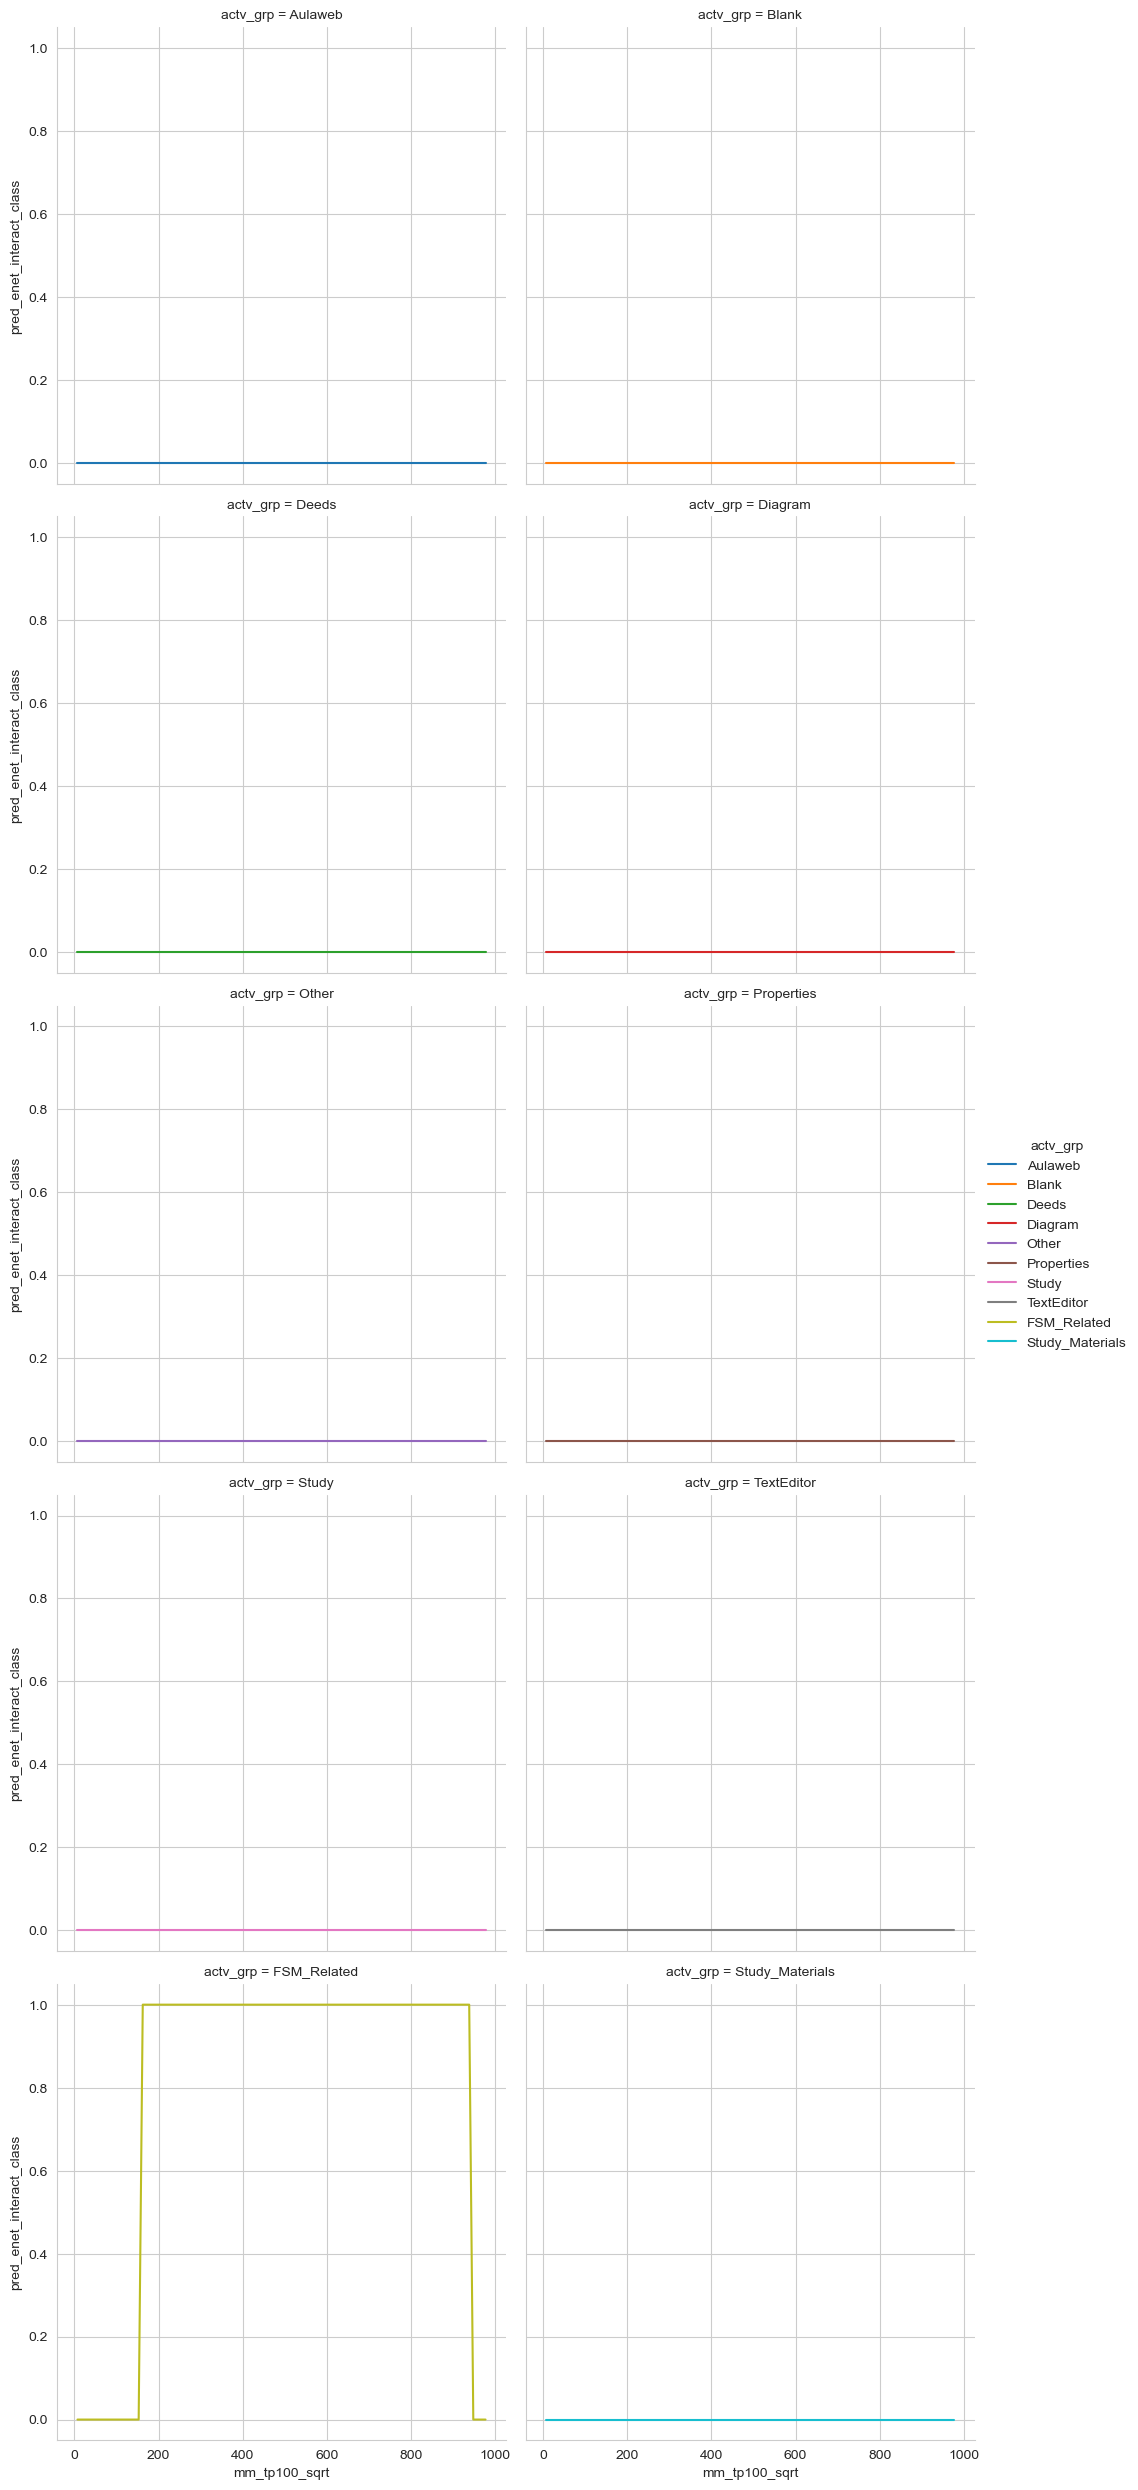

In [168]:
sns.relplot(data = input_grid_b_copy, x='mm_tp100_sqrt', y='pred_enet_interact_class', 
            col='actv_grp', col_wrap=2, hue='actv_grp', kind='line')

plt.show()

##### Save data for comparison

In [169]:
s2_pc_scores_12_df = pc_scores_12_df.copy()

In [170]:
%store s2_pc_scores_12_df

Stored 's2_pc_scores_12_df' (DataFrame)


In [171]:
s2_pc_scores_outp_df = pc_scores_outp_df.copy()

In [172]:
%store s2_pc_scores_outp_df

Stored 's2_pc_scores_outp_df' (DataFrame)


In [173]:
s2_additv_sid_model_coef = enet_additv_search_results.best_estimator_.named_steps['enet'].coef_

In [174]:
%store s2_additv_sid_model_coef

Stored 's2_additv_sid_model_coef' (ndarray)


In [175]:
s2_interact_nosid_model_coef = enet_interact_search_results.best_estimator_.named_steps['enet'].coef_

In [176]:
%store s2_interact_nosid_model_coef

Stored 's2_interact_nosid_model_coef' (ndarray)


In [177]:
s2_additv_sid_model_params = enet_additv_search_results.best_params_

In [178]:
%store s2_additv_sid_model_params

Stored 's2_additv_sid_model_params' (dict)


In [179]:
s2_interact_nosid_model_params = enet_interact_search_results.best_params_

In [180]:
%store s2_interact_nosid_model_params

Stored 's2_interact_nosid_model_params' (dict)


In [181]:
s2_additv_sid_model_score = enet_additv_search_results.best_score_

In [182]:
%store s2_additv_sid_model_score

Stored 's2_additv_sid_model_score' (float64)


In [183]:
s2_interact_nosid_model_score = enet_interact_search_results.best_score_

In [184]:
%store s2_interact_nosid_model_score

Stored 's2_interact_nosid_model_score' (float64)


In [185]:
s2_input_grid_copy = input_grid_copy.copy()

In [186]:
%store s2_input_grid_copy

Stored 's2_input_grid_copy' (DataFrame)


In [187]:
s2_input_grid_b_copy = input_grid_b_copy.copy()

In [188]:
%store s2_input_grid_b_copy

Stored 's2_input_grid_b_copy' (DataFrame)
